# Plant Seedlings Classification

## Problem Statement

### Context

In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term. The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can actually benefit the workers in this field, as **the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning.** The ability to do so far more efficiently and even more effectively than experienced manual labor, could lead to better crop yields, the freeing up of human inolvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.


### Objective

The aim of this project is to Build a Convolutional Neural Netowrk to classify plant seedlings into their respective categories.

### Data Dictionary

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has recently released a dataset containing **images of unique plants belonging to 12 different species.**

- The goal of the project is to create a classifier capable of determining a plant's species from an image.

**List of Species**

- Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common Wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
!pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 opencv-python==4.8.0.76 -q --user

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 53.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 1.5.3 which is incompatible.


In [ ]:
import os
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2                                                                                       # Importing openCV for image processing
import seaborn as sns                                                                            # Importing seaborn to plot graphs


# Tensorflow modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD                                                 # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix                                                     # Importing confusion_matrix to plot the confusion matrix
from sklearn.preprocessing import LabelBinarizer                                                 # Convert labels from names to one hot vectors.
from keras.callbacks import ReduceLROnPlateau

# Display images using OpenCV
from google.colab.patches import cv2_imshow                                                      # Importing cv2_imshow from google.patches to display images

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the image file of the dataset
images = np.load('/content/drive/MyDrive/images.npy')

# Load the labels file of the dataset
labels = pd.read_csv('/content/drive/MyDrive/Labels.csv')

## Data Overview

### Understand the shape of the dataset

Let's print the shape of the images and labels

In [ ]:
print(images.shape)
print(labels.shape)

(4750, 128, 128, 3)
(4750, 1)


There are 4750 RGB  images of shape 128 x 128 X 3, each image having 3 channels.

## Plotting images using OpenCV and matplotlib

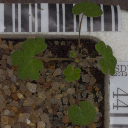

In [ ]:
cv2_imshow(images[80])

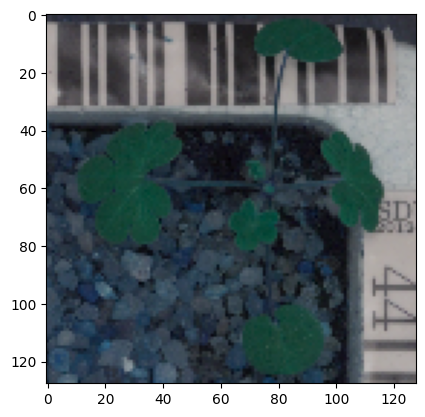

In [ ]:
plt.imshow(images[80]);

- We can observe that the images are being shown in different colors when plotted with openCV and matplotlib as OpenCV reads images in BGR format and this shows that the given numpy arrays were generated from the original images using OpenCV.

## Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help to understand the data better.

1. How are these different category plant images different from each other?
2. Is the dataset provided an imbalance?

In [ ]:
def plot_images(images,labels):
  num_classes=12                                                                  # Number of Classes
  categories=np.unique(labels)
  keys=dict(labels['Label'])                                                      # Obtaing the unique classes from y_train
  rows = 3                                                                        # Defining number of rows=3
  cols = 4                                                                        # Defining number of columns=4
  fig = plt.figure(figsize=(17, 12))                                               # Defining the figure size to 10x8
  for i in range(cols):
      for j in range(rows):
          random_index = np.random.randint(0, len(labels))                        # Generating random indices from the data and plotting the images
          ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 3 rows and 4 columns
          ax.imshow(images[random_index, :])                                      # Plotting the image
          ax.set_title(keys[random_index])
  plt.show()

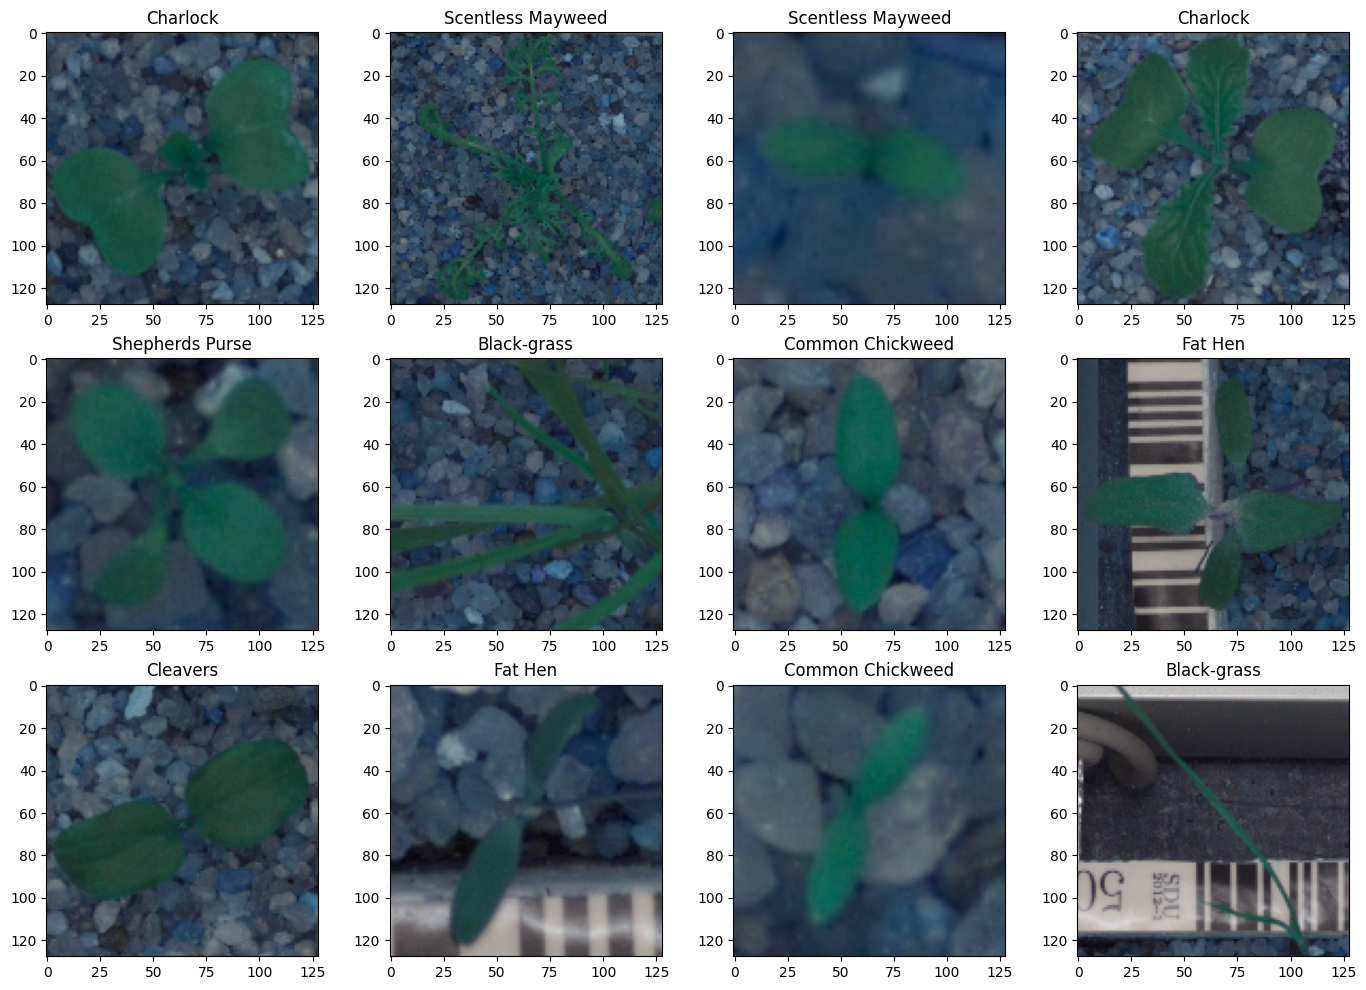

In [ ]:
plot_images(images,labels)

<b> Checking for data imbalance

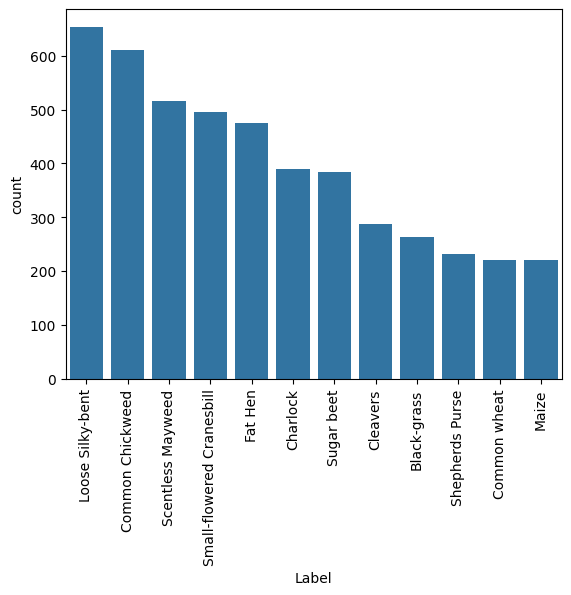

In [ ]:
 # Calculate the frequency of each label
label_counts = labels['Label'].value_counts()

# Get the sorted order of the labels
sorted_labels = label_counts.index

# Create the count plot with sorted labels
sns.countplot(x='Label', data=labels, order=sorted_labels)

# Rotate the x-ticks for better readability
plt.xticks(rotation='vertical');

- As we can see data is imbalanced, "maize" is nearly the half of "loose silky-bent"

### How is data concentrated?

In [ ]:
round(labels['Label'].value_counts(normalize= True),2)*100

Label
Loose Silky-bent             14.0
Common Chickweed             13.0
Scentless Mayweed            11.0
Small-flowered Cranesbill    10.0
Fat Hen                      10.0
Charlock                      8.0
Sugar beet                    8.0
Cleavers                      6.0
Black-grass                   6.0
Shepherds Purse               5.0
Common wheat                  5.0
Maize                         5.0
Name: proportion, dtype: float64

- Between the first 3 classes, we've got 38% of the cumulated data
- If we add the next 2, the concentration is around 58%

Let's check on RGB channels:

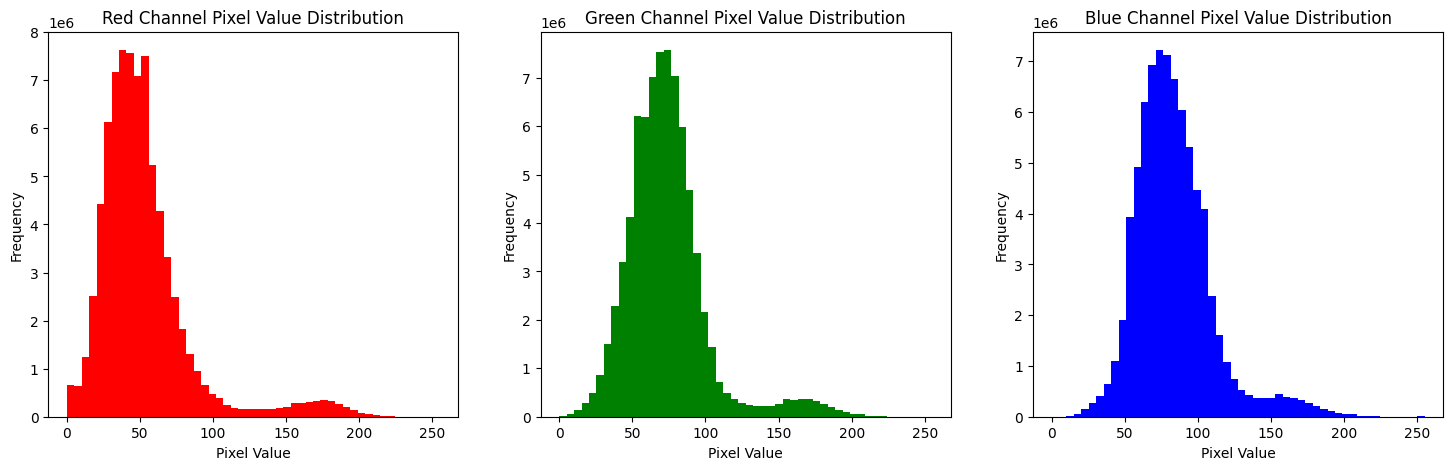

In [ ]:
all_pixels = np.concatenate([img.reshape(-1, 3) for img in images], axis=0)
colors = ['Red', 'Green', 'Blue']

plt.figure(figsize=(18, 5))
for i, color in enumerate(colors):
    plt.subplot(1, 3, i+1)
    plt.hist(all_pixels[:, i], bins=50, color=color.lower())
    plt.title(f'{color} Channel Pixel Value Distribution')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')

plt.show()

Patterns of RGB on images looks pretty similar

***EDA will continue in the final part of the notebook.***

## Data Pre-Processing

### Convert the BGR images to RGB images.

In [ ]:
# Converting the images from BGR to RGB using cvtColor function of OpenCV
for i in range(len(images)):
  images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)

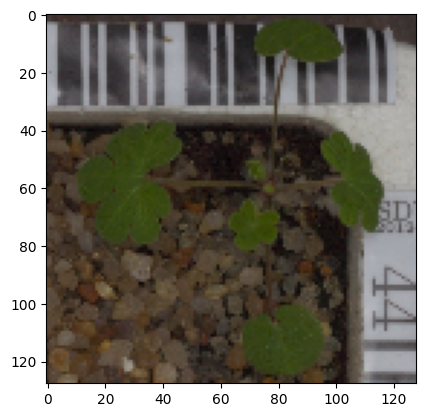

In [ ]:
plt.imshow(images[80]);

- Now we can see that is already modified

### Resize the images

As the size of the images is large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 128 to 64.

In [ ]:
images_decreased=[]
height = 64
width = 64
dimensions = (width, height)
for i in range(len(images)):
  images_decreased.append( cv2.resize(images[i], dimensions, interpolation=cv2.INTER_LINEAR))

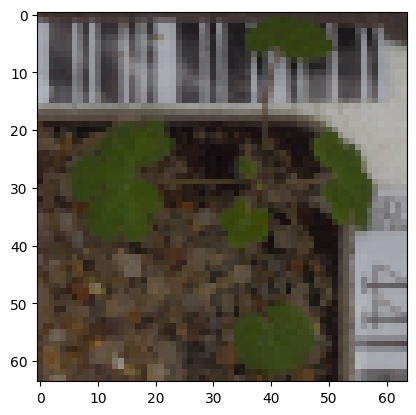

In [ ]:
plt.imshow(images_decreased[80]);

### Data Preparation for Modeling

**Split the dataset**

- We will only use 10% of our data for testing, 10% of our data for validation and 80% of our data for training.
- We split the dataset into three parts, train,test and validation

In [ ]:
X_temp, X_test, y_temp, y_test = train_test_split(np.array(images_decreased),labels , test_size=0.1, random_state=1,stratify=labels)
X_train, X_val, y_train, y_val = train_test_split(X_temp,y_temp , test_size=0.1, random_state=42,stratify=y_temp)

Let's check datasets shape

In [ ]:
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(3847, 64, 64, 3) (3847, 1)
(428, 64, 64, 3) (428, 1)
(475, 64, 64, 3) (475, 1)


### Encode the target labels

In [ ]:
enc = LabelBinarizer()
y_train_encoded = enc.fit_transform(y_train)
y_val_encoded=enc.transform(y_val)
y_test_encoded=enc.transform(y_test)

In [ ]:
# Print the class names and their corresponding indices
class_indices = enc.classes_
for index, class_name in enumerate(class_indices):
    print(f"Class index {index}: {class_name}")

Class index 0: Black-grass
Class index 1: Charlock
Class index 2: Cleavers
Class index 3: Common Chickweed
Class index 4: Common wheat
Class index 5: Fat Hen
Class index 6: Loose Silky-bent
Class index 7: Maize
Class index 8: Scentless Mayweed
Class index 9: Shepherds Purse
Class index 10: Small-flowered Cranesbill
Class index 11: Sugar beet


### Data Normalization

Since the image pixel values range from 0-255, our method of normalization here will be scaling - we shall divide all the pixel values by 255 to standardize the images to have values between 0-1.

In [ ]:
# Normalizing the image pixels
X_train_normalized = X_train.astype('float32')/255.0
X_val_normalized = X_val.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

## Model Building

## **Model 1**

We are going to create a CNN model sequentially, adding the layers one after each other.

First, we need to clear the previous model's history from the session even if a single model can run multiple times on the same data.

In [ ]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
# Fixing the seed for random number generators
import random
np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

Now, let's build a **CNN Model** with the following 2 main parts - <br>

1. **The Feature Extraction layers** which are comprised of convolutional and pooling layers.
2. **The Fully Connected classification layers** for prediction.<br><br>


In [ ]:
# Intializing a sequential model
model = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
model.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model.add(MaxPooling2D((2, 2), padding = 'same'))

model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D((2, 2), padding = 'same'))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model.add(Flatten())

# Adding a fully connected dense layer with 16 neurons
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))
# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
model.add(Dense(12, activation='softmax'))

# Using SGD Optimizer
opt = SGD(learning_rate=0.01, momentum=0.9)

# Compile model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 16)                1

### <b> Fitting the model on the train data

In [ ]:
history_1 = model.fit(
            X_train_normalized, y_train_encoded,
            epochs=30,
            validation_data=(X_val_normalized,y_val_encoded),
            batch_size=32,
            verbose=2
)

Epoch 1/30
121/121 - 6s - loss: 2.4466 - accuracy: 0.1256 - val_loss: 2.4224 - val_accuracy: 0.1402 - 6s/epoch - 49ms/step
Epoch 2/30
121/121 - 1s - loss: 2.4219 - accuracy: 0.1339 - val_loss: 2.4185 - val_accuracy: 0.1308 - 1s/epoch - 9ms/step
Epoch 3/30
121/121 - 1s - loss: 2.4177 - accuracy: 0.1323 - val_loss: 2.4124 - val_accuracy: 0.1379 - 786ms/epoch - 6ms/step
Epoch 4/30
121/121 - 1s - loss: 2.4049 - accuracy: 0.1302 - val_loss: 2.3855 - val_accuracy: 0.1379 - 867ms/epoch - 7ms/step
Epoch 5/30
121/121 - 2s - loss: 2.3474 - accuracy: 0.1721 - val_loss: 2.2555 - val_accuracy: 0.2477 - 2s/epoch - 15ms/step
Epoch 6/30
121/121 - 1s - loss: 2.1620 - accuracy: 0.2514 - val_loss: 1.8283 - val_accuracy: 0.3505 - 1s/epoch - 9ms/step
Epoch 7/30
121/121 - 1s - loss: 1.8789 - accuracy: 0.3429 - val_loss: 1.5944 - val_accuracy: 0.4019 - 959ms/epoch - 8ms/step
Epoch 8/30
121/121 - 1s - loss: 1.7886 - accuracy: 0.3457 - val_loss: 1.5745 - val_accuracy: 0.4065 - 734ms/epoch - 6ms/step
Epoch 9/30

### **Model Evaluation**

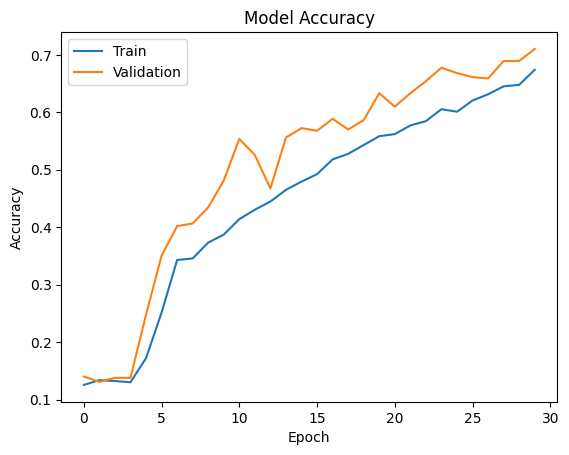

In [ ]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations:**


*   We can see from the above plot that **training accuracy of the model was good and the validation accuracy improves training accuracy.**
*   This could probably happen because we add dropout on training.







### **Evaluating the model on test data**

In [ ]:
accuracy = model.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - loss: 0.9905 - accuracy: 0.6737 - 217ms/epoch - 14ms/step


### **Generating the predictions using test data**

In [ ]:
# Here we would get the output as probablities for each category
y_pred=model.predict(X_test_normalized)

15/15 [==============================] - 0s 2ms/step


In [ ]:
y_pred

array([[7.2847150e-02, 9.2305902e-07, 3.2650300e-03, ..., 2.1466874e-05,
        4.7757871e-02, 1.1057266e-01],
       [3.5930338e-08, 8.5868210e-02, 1.7154147e-01, ..., 1.0997201e-02,
        7.2690427e-01, 3.9376179e-03],
       [3.4366639e-03, 1.9186590e-03, 9.0262247e-03, ..., 1.7809177e-02,
        8.1520025e-03, 6.8670467e-02],
       ...,
       [6.9449985e-10, 6.6384810e-01, 3.1794664e-01, ..., 1.9265889e-03,
        1.2524915e-02, 3.6585731e-03],
       [4.4187999e-07, 1.9504785e-06, 3.2882683e-10, ..., 4.2199120e-02,
        5.3548440e-02, 1.2872816e-03],
       [2.6224868e-02, 8.4366230e-04, 6.0186990e-02, ..., 1.6204852e-03,
        7.0532784e-05, 1.0539542e-01]], dtype=float32)

### **Plotting the Confusion Matrix**

*   The Confusion matrix is also defined as an inbuilt function in the TensorFlow module, so we can use that for evaluating the classification model.
*   The Confusion matrix expects categorical data as input. However, y_test_encoded is an encoded value, whereas y_pred has probabilities. So,we must retrieve the categorical values from the encoded values.
*   We will use the `argmax()` function to obtain the maximum value over each category on both y_test_encoded and y_pred and obtain their respective classes.





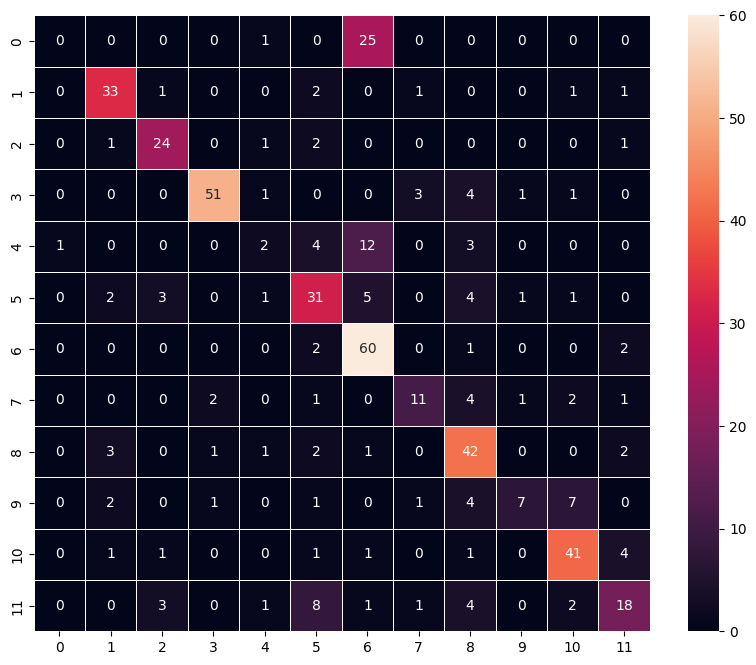

In [ ]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

<b> Observations</b><br>
- Because of class imbalance, there are less examples in some categories.
- A priori, it seems that only classes 3 and 6 are well classified.
- Also we can observe that classes 0,4,7,9 and 11 are mostly misclassified.

#### Let's check it in terms of percentage to clarify the numbers

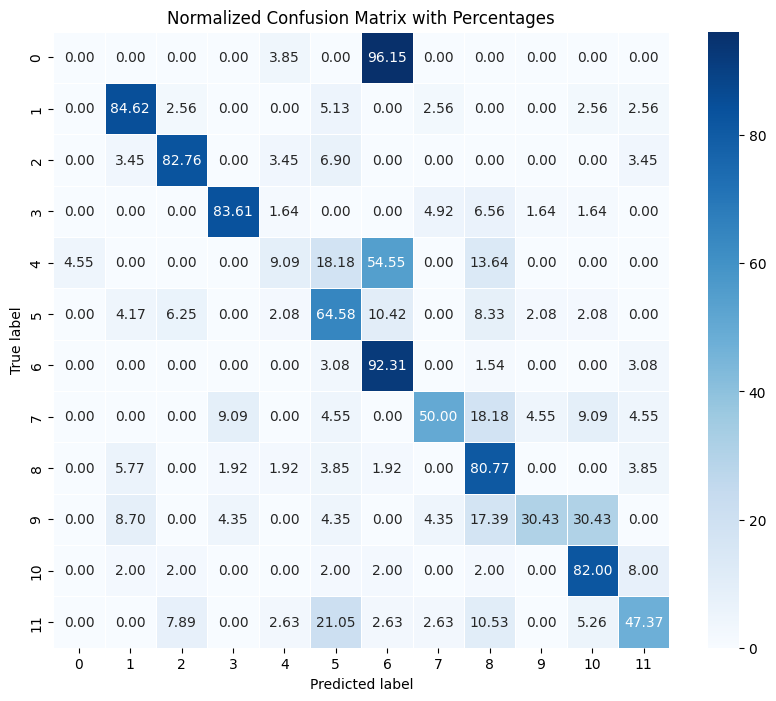

In [ ]:
from sklearn.metrics import confusion_matrix as sk_confusion_matrix

# Assuming y_test_encoded and y_pred are already defined
# Example:
# y_test_encoded = tf.keras.utils.to_categorical(y_test, num_classes)
# y_pred = model.predict(x_test)

# Obtain the categorical values from y_test_encoded and y_pred
y_pred_arg = np.argmax(y_pred, axis=1)
y_test_arg = np.argmax(y_test_encoded, axis=1)

# Compute the confusion matrix using sklearn's confusion_matrix function
conf_matrix = sk_confusion_matrix(y_test_arg, y_pred_arg)

# Normalize the confusion matrix by row (i.e., by the number of samples in each actual class)
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Convert to percentage
conf_matrix_percentage = conf_matrix_normalized * 100

# Plot the normalized confusion matrix
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    conf_matrix_percentage,
    annot=True,
    fmt=".2f",  # Display values as floating-point numbers with 2 decimal places
    linewidths=.4,
    square=True,
    cmap="Blues",  # Choose a color map
    ax=ax
)
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
ax.set_title('Normalized Confusion Matrix with Percentages')

plt.show()

- Class 0 is being classified as class 6 96% of the times. Totally wrong.
- Now we can see that not only classes 3 and 6 are well classified, classes 1,2,8 and 10 are also right.
- Classes 4, 7, 9 and 11 have been misclassified between other several classes. There's margin to improve.

## **Model 2**

Because of the plot, we can assume that adding more epochs, decreasing learning rate on SGD and erasing dropout, maybe we can have a better model. Let's do those modifications.

First, we need to clear the previous model's history from the session even if a single model can run multiple times on the same data.

In [ ]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
# Fixing the seed for random number generators
import random
np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

In [ ]:
# Intializing a sequential model
model_2 = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
model_2.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model_2.add(MaxPooling2D((2, 2), padding = 'same'))

model_2.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model_2.add(MaxPooling2D((2, 2), padding = 'same'))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model_2.add(Flatten())

# Adding a fully connected dense layer with 16 neurons
model_2.add(Dense(16, activation='relu'))
# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
model_2.add(Dense(12, activation='softmax'))

# Using SGD Optimizer
opt = SGD(learning_rate=0.001, momentum=0.9)

# Compile model
model_2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 16)                1

### <b> Fitting the model on the train data

In [ ]:
history_2 = model_2.fit(
            X_train_normalized, y_train_encoded,
            epochs=40,
            validation_data=(X_val_normalized,y_val_encoded),
            batch_size=32,
            verbose=2
)

Epoch 1/40
121/121 - 2s - loss: 2.4618 - accuracy: 0.1107 - val_loss: 2.4418 - val_accuracy: 0.1262 - 2s/epoch - 14ms/step
Epoch 2/40
121/121 - 1s - loss: 2.4323 - accuracy: 0.1341 - val_loss: 2.4192 - val_accuracy: 0.1682 - 669ms/epoch - 6ms/step
Epoch 3/40
121/121 - 1s - loss: 2.4150 - accuracy: 0.1404 - val_loss: 2.4073 - val_accuracy: 0.1425 - 786ms/epoch - 6ms/step
Epoch 4/40
121/121 - 1s - loss: 2.4042 - accuracy: 0.1414 - val_loss: 2.4012 - val_accuracy: 0.1449 - 820ms/epoch - 7ms/step
Epoch 5/40
121/121 - 1s - loss: 2.3947 - accuracy: 0.1500 - val_loss: 2.3914 - val_accuracy: 0.1659 - 1s/epoch - 9ms/step
Epoch 6/40
121/121 - 1s - loss: 2.3822 - accuracy: 0.1617 - val_loss: 2.3834 - val_accuracy: 0.1519 - 1s/epoch - 11ms/step
Epoch 7/40
121/121 - 1s - loss: 2.3607 - accuracy: 0.1851 - val_loss: 2.3725 - val_accuracy: 0.1799 - 1s/epoch - 10ms/step
Epoch 8/40
121/121 - 1s - loss: 2.3291 - accuracy: 0.2199 - val_loss: 2.3146 - val_accuracy: 0.2617 - 1s/epoch - 9ms/step
Epoch 9/40
1

### **Model Evaluation**

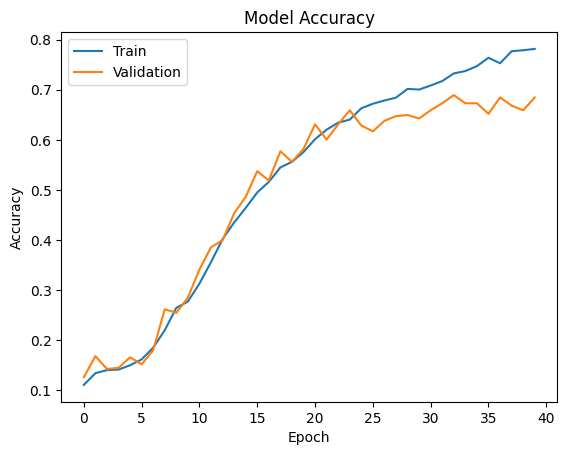

In [ ]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations:**


*   We can see from the above plot that **training accuracy of the model was good but the validation accuracy decreases on several points.**
*   This is saying us that model is overfitted.







### **Evaluating the model on test data**

In [ ]:
accuracy = model_2.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - loss: 1.1680 - accuracy: 0.6168 - 168ms/epoch - 11ms/step


Accuracy on test has decreased.

<b> Observations</b><br>
- Because of modifications on model architecture, model is overfitted.
- We are not going to check on confusion matrix because model performance is worse than previous model.

## **Model 3**

We've seen that model doesn't improved, so, now we are going to try to add batch normalization instead of dropout in the last hidden layer before output, and we go back with learning rate to 0.01

First, we need to clear the previous model's history from the session even if a single model can run multiple times on the same data.

In [ ]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
# Fixing the seed for random number generators
import random
np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

In [ ]:
# Intializing a sequential model
model_3 = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
model_3.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model_3.add(MaxPooling2D((2, 2), padding = 'same'))

model_3.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model_3.add(MaxPooling2D((2, 2), padding = 'same'))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model_3.add(Flatten())

# Adding a fully connected dense layer with 16 neurons
model_3.add(Dense(16, activation='relu'))
model_3.add(BatchNormalization())
# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
model_3.add(Dense(12, activation='softmax'))

# Using SGD Optimizer
opt = SGD(learning_rate=0.01, momentum=0.9)

# Compile model
model_3.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 16)                1

### <b> Fitting the model on the train data

In [ ]:
history_3 = model_3.fit(
            X_train_normalized, y_train_encoded,
            epochs=40,
            validation_data=(X_val_normalized,y_val_encoded),
            batch_size=32,
            verbose=2
)

Epoch 1/40
121/121 - 3s - loss: 1.9954 - accuracy: 0.3304 - val_loss: 6.9269 - val_accuracy: 0.0818 - 3s/epoch - 24ms/step
Epoch 2/40
121/121 - 1s - loss: 1.4336 - accuracy: 0.5188 - val_loss: 19.0958 - val_accuracy: 0.0958 - 900ms/epoch - 7ms/step
Epoch 3/40
121/121 - 1s - loss: 1.1751 - accuracy: 0.6075 - val_loss: 6.0443 - val_accuracy: 0.1262 - 951ms/epoch - 8ms/step
Epoch 4/40
121/121 - 1s - loss: 1.0239 - accuracy: 0.6569 - val_loss: 9.3228 - val_accuracy: 0.0935 - 1s/epoch - 8ms/step
Epoch 5/40
121/121 - 1s - loss: 0.9104 - accuracy: 0.6956 - val_loss: 1.9318 - val_accuracy: 0.5210 - 899ms/epoch - 7ms/step
Epoch 6/40
121/121 - 1s - loss: 0.7805 - accuracy: 0.7455 - val_loss: 5.1861 - val_accuracy: 0.2430 - 767ms/epoch - 6ms/step
Epoch 7/40
121/121 - 1s - loss: 0.6928 - accuracy: 0.7697 - val_loss: 1.7746 - val_accuracy: 0.5140 - 773ms/epoch - 6ms/step
Epoch 8/40
121/121 - 1s - loss: 0.6396 - accuracy: 0.7894 - val_loss: 2.6367 - val_accuracy: 0.4393 - 742ms/epoch - 6ms/step
Epoc

### **Model Evaluation**

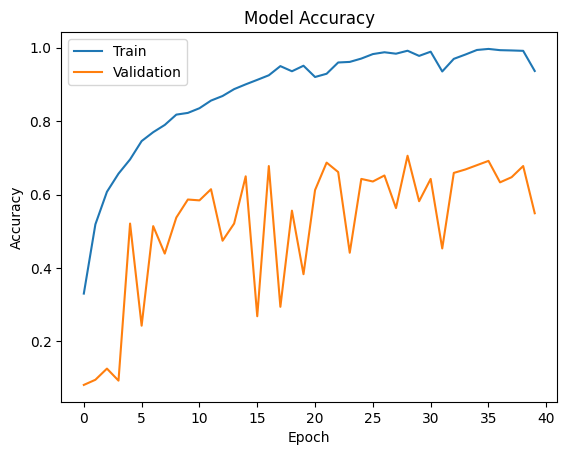

In [ ]:
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations:**


*   We can see from the above plot that **training accuracy of the model is pretty good but the validation accuracy totally decreases and oscillates.**
*   This is saying us that model is completely overfitted.







### **Evaluating the model on test data**

In [ ]:
accuracy = model_3.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - loss: 3.2669 - accuracy: 0.5789 - 72ms/epoch - 5ms/step


Accuracy on test has decreased.

<b> Observations</b><br>
- Because of modifications on model architecture, model is even more overfitted.
- We are not going to check on confusion matrix because model performance is even worse than previous model.

## **Model 4**

We've seen that model is going worse and we can't get improvement on validation set. We are going to do some steps back, and we are going to add dropout in previous layers.

First, we need to clear the previous model's history from the session even if a single model can run multiple times on the same data.

In [ ]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
# Fixing the seed for random number generators
import random
np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

In [ ]:
# Intializing a sequential model
model_4 = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
model_4.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model_4.add(MaxPooling2D((2, 2), padding = 'same'))
model_4.add(Dropout(0.25))

model_4.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model_4.add(MaxPooling2D((2, 2), padding = 'same'))
model_4.add(Dropout(0.25))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model_4.add(Flatten())

# Adding a fully connected dense layer with 16 neurons
model_4.add(Dense(16, activation='relu'))
model_4.add(Dropout(0.25))

# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
model_4.add(Dense(12, activation='softmax'))

# Using SGD Optimizer
opt = SGD(learning_rate=0.01, momentum=0.9)

# Compile model
model_4.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 32, 32, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

### <b> Fitting the model on the train data

In [ ]:
history_4 = model_4.fit(
            X_train_normalized, y_train_encoded,
            epochs=30,
            validation_data=(X_val_normalized,y_val_encoded),
            batch_size=32,
            verbose=2
)

Epoch 1/30
121/121 - 2s - loss: 2.4359 - accuracy: 0.1243 - val_loss: 2.4312 - val_accuracy: 0.1285 - 2s/epoch - 17ms/step
Epoch 2/30
121/121 - 1s - loss: 2.3975 - accuracy: 0.1671 - val_loss: 2.3098 - val_accuracy: 0.1752 - 917ms/epoch - 8ms/step
Epoch 3/30
121/121 - 1s - loss: 2.0600 - accuracy: 0.2862 - val_loss: 1.7666 - val_accuracy: 0.3645 - 944ms/epoch - 8ms/step
Epoch 4/30
121/121 - 1s - loss: 1.8395 - accuracy: 0.3340 - val_loss: 1.6120 - val_accuracy: 0.4042 - 925ms/epoch - 8ms/step
Epoch 5/30
121/121 - 1s - loss: 1.7593 - accuracy: 0.3509 - val_loss: 1.5977 - val_accuracy: 0.4252 - 932ms/epoch - 8ms/step
Epoch 6/30
121/121 - 1s - loss: 1.7082 - accuracy: 0.3785 - val_loss: 1.5220 - val_accuracy: 0.4533 - 939ms/epoch - 8ms/step
Epoch 7/30
121/121 - 1s - loss: 1.6447 - accuracy: 0.4045 - val_loss: 1.4657 - val_accuracy: 0.4930 - 935ms/epoch - 8ms/step
Epoch 8/30
121/121 - 1s - loss: 1.6206 - accuracy: 0.4050 - val_loss: 1.4492 - val_accuracy: 0.4603 - 1s/epoch - 8ms/step
Epoch

### **Model Evaluation**

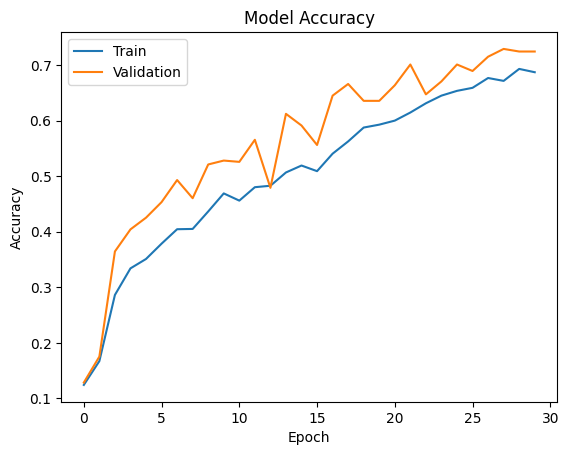

In [ ]:
plt.plot(history_4.history['accuracy'])
plt.plot(history_4.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations:**


*   We can see from the above plot that **training accuracy of the model is  good and validation accuracy increases from previous models.**
*   Here we avoided overfitting, so, previous model were learning lot more than wished. Still, there is margin of improvement.







### **Evaluating the model on test data**

In [ ]:
accuracy = model_4.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - loss: 0.9156 - accuracy: 0.6905 - 109ms/epoch - 7ms/step


Accuracy on test has increased a point and a half from first model.

### **Generating the predictions using test data**

In [ ]:
# Here we would get the output as probablities for each category
y_pred=model_4.predict(X_test_normalized)

15/15 [==============================] - 0s 3ms/step


In [ ]:
y_pred

array([[6.90076593e-03, 4.93589323e-05, 1.14653994e-04, ...,
        1.76639389e-03, 6.77891076e-01, 3.35785151e-02],
       [2.29463512e-06, 9.20571238e-02, 5.81750367e-03, ...,
        6.07591821e-03, 8.92840683e-01, 3.34519369e-04],
       [3.21790949e-03, 1.43707950e-06, 2.08564779e-05, ...,
        1.14420839e-02, 5.34476014e-04, 8.12921599e-02],
       ...,
       [6.77947901e-05, 4.64023590e-01, 4.83429402e-01, ...,
        6.34526368e-03, 5.05098887e-03, 5.44948643e-03],
       [9.30252384e-07, 1.00456610e-09, 1.98897371e-10, ...,
        1.56491641e-02, 5.18592205e-05, 1.32508595e-02],
       [1.57910343e-02, 2.87803058e-02, 1.74241513e-01, ...,
        1.91993490e-02, 1.31723918e-02, 2.34135151e-01]], dtype=float32)

### **Plotting the Confusion Matrix**

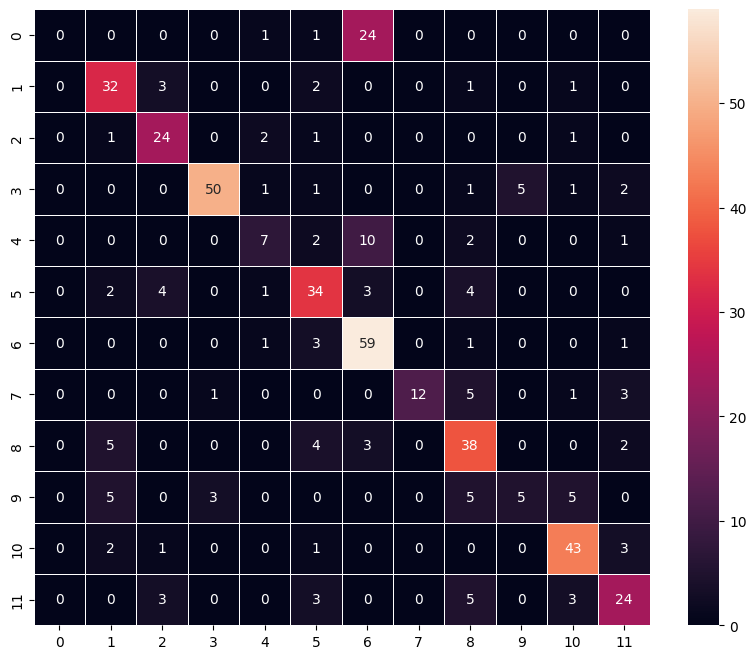

In [ ]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

<b> Observations</b><br>
- The changes are marginals on different classes. Some have improved by 5, others have been misclassified by 3.
- Worst performing classes, remains the same.
- We need to continue improving model.

## **Model 5**

Model have improved. We are going to add more dropout and we are going to change SGD optimizer for Adam.

First, we need to clear the previous model's history from the session even if a single model can run multiple times on the same data.

In [ ]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
# Fixing the seed for random number generators
import random
np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

In [ ]:
# Intializing a sequential model
model_5 = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
model_5.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model_5.add(MaxPooling2D((2, 2), padding = 'same'))
model_5.add(Dropout(0.30))

model_5.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model_5.add(MaxPooling2D((2, 2), padding = 'same'))
model_5.add(Dropout(0.30))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model_5.add(Flatten())

# Adding a fully connected dense layer with 16 neurons
model_5.add(Dense(16, activation='relu'))
model_5.add(Dropout(0.30))

# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
model_5.add(Dense(12, activation='softmax'))

# Using Adam Optimizer
opt = Adam()

# Compile model
model_5.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model_5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 32, 32, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

### <b> Fitting the model on the train data

In [ ]:
history_5 = model_5.fit(
            X_train_normalized, y_train_encoded,
            epochs=30,
            validation_data=(X_val_normalized,y_val_encoded),
            batch_size=32,
            verbose=2
)

Epoch 1/30
121/121 - 7s - loss: 2.4433 - accuracy: 0.1214 - val_loss: 2.4111 - val_accuracy: 0.2617 - 7s/epoch - 61ms/step
Epoch 2/30
121/121 - 1s - loss: 2.2777 - accuracy: 0.2399 - val_loss: 2.0389 - val_accuracy: 0.3668 - 927ms/epoch - 8ms/step
Epoch 3/30
121/121 - 1s - loss: 1.9832 - accuracy: 0.3080 - val_loss: 1.8459 - val_accuracy: 0.4229 - 908ms/epoch - 8ms/step
Epoch 4/30
121/121 - 1s - loss: 1.8756 - accuracy: 0.3293 - val_loss: 1.6611 - val_accuracy: 0.4626 - 934ms/epoch - 8ms/step
Epoch 5/30
121/121 - 1s - loss: 1.7770 - accuracy: 0.3486 - val_loss: 1.5405 - val_accuracy: 0.4743 - 937ms/epoch - 8ms/step
Epoch 6/30
121/121 - 1s - loss: 1.6991 - accuracy: 0.3772 - val_loss: 1.4625 - val_accuracy: 0.5070 - 915ms/epoch - 8ms/step
Epoch 7/30
121/121 - 1s - loss: 1.6458 - accuracy: 0.3891 - val_loss: 1.4469 - val_accuracy: 0.5140 - 914ms/epoch - 8ms/step
Epoch 8/30
121/121 - 1s - loss: 1.6218 - accuracy: 0.3889 - val_loss: 1.3456 - val_accuracy: 0.5491 - 923ms/epoch - 8ms/step
Ep

### **Model Evaluation**

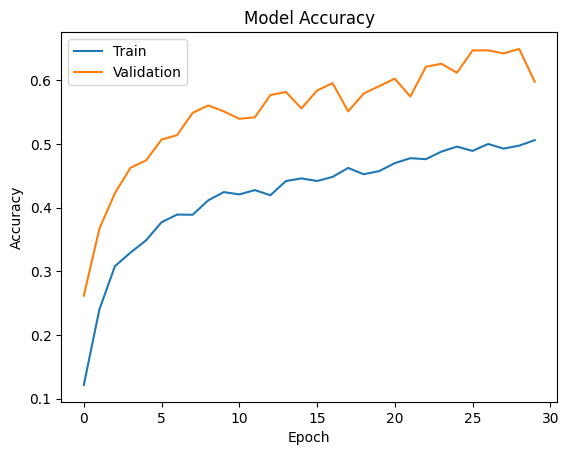

In [ ]:
plt.plot(history_5.history['accuracy'])
plt.plot(history_5.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations:**


*   We can see from the above plot that **training accuracy of the model decrease notably and validation accuracy is better but still lower than previous models.**
*   Here we avoided overfitting, but model is still not learning.







### **Evaluating the model on test data**

In [ ]:
accuracy = model_5.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - loss: 1.1670 - accuracy: 0.6126 - 210ms/epoch - 14ms/step


Accuracy on test has decreased 8 points by far. We are not going to plot confusion matrix

## **Model 6**

Model have not improved.

Everytime our model is not reaching out his total capability, so we are going to add two more layers in order to help model
to learn.

First, we need to clear the previous model's history from the session even if a single model can run multiple times on the same data.

In [ ]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
# Fixing the seed for random number generators
import random
np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

In [ ]:
# Intializing a sequential model
model_6 = Sequential()

# Adding first conv layer with 128 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
model_6.add(Conv2D(128, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))
# Adding max pooling to reduce the size of output of first conv layer
model_6.add(MaxPooling2D((2, 2), padding = 'same'))
model_6.add(Dropout(0.25))

model_6.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model_6.add(MaxPooling2D((2, 2), padding = 'same'))
model_6.add(Dropout(0.25))

model_6.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model_6.add(MaxPooling2D((2, 2), padding = 'same'))
model_6.add(Dropout(0.25))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model_6.add(Flatten())

# Adding a fully connected dense layer with 32 neurons
model_6.add(Dense(32, activation='relu'))
# Adding a fully connected dense layer with 16 neurons
model_6.add(Dense(16, activation='relu'))

# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
model_6.add(Dense(12, activation='softmax'))

# Using Adam Optimizer
opt = Adam()

# Compile model
model_6.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model_6.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 128)       0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 32, 32, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0

### <b> Fitting the model on the train data

In [ ]:
history_6 = model_6.fit(
            X_train_normalized, y_train_encoded,
            epochs=30,
            validation_data=(X_val_normalized,y_val_encoded),
            batch_size=32,
            verbose=2
)

Epoch 1/30
121/121 - 95s - loss: 1.9607 - accuracy: 0.3353 - val_loss: 1.6956 - val_accuracy: 0.4369 - 95s/epoch - 788ms/step
Epoch 2/30
121/121 - 92s - loss: 1.5475 - accuracy: 0.4500 - val_loss: 1.4528 - val_accuracy: 0.5000 - 92s/epoch - 760ms/step
Epoch 3/30
121/121 - 92s - loss: 1.3328 - accuracy: 0.5269 - val_loss: 1.4033 - val_accuracy: 0.5280 - 92s/epoch - 764ms/step
Epoch 4/30
121/121 - 93s - loss: 1.2048 - accuracy: 0.5849 - val_loss: 1.1070 - val_accuracy: 0.6355 - 93s/epoch - 766ms/step
Epoch 5/30
121/121 - 105s - loss: 1.0417 - accuracy: 0.6350 - val_loss: 0.9698 - val_accuracy: 0.6706 - 105s/epoch - 871ms/step
Epoch 6/30
121/121 - 91s - loss: 1.0047 - accuracy: 0.6579 - val_loss: 0.9466 - val_accuracy: 0.6963 - 91s/epoch - 754ms/step
Epoch 7/30
121/121 - 101s - loss: 0.9205 - accuracy: 0.6782 - val_loss: 0.9832 - val_accuracy: 0.6846 - 101s/epoch - 836ms/step
Epoch 8/30
121/121 - 93s - loss: 0.8743 - accuracy: 0.6987 - val_loss: 1.0198 - val_accuracy: 0.6869 - 93s/epoch -

### **Model Evaluation**

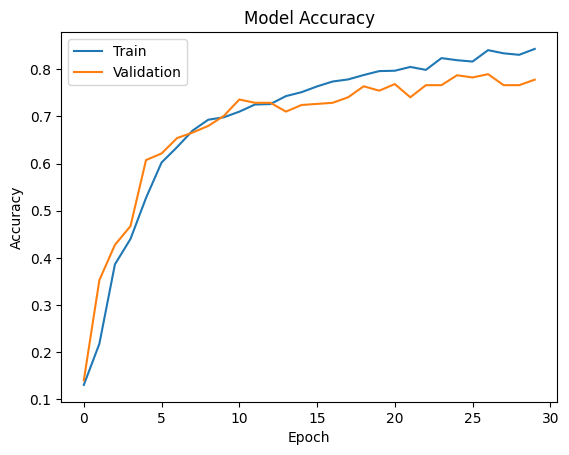

In [ ]:
plt.plot(history_6.history['accuracy'])
plt.plot(history_6.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations:**


*   Now we can see that **training accuracy** of the model **increases reaching .80** and **validation accuracy** also **reaches nearer .78**.
*   Model starts to generalize, also increasing the level of accuracy.
* It looks like it was a matter of neurons and lacks of power to learn.







### **Evaluating the model on test data**

In [ ]:
accuracy = model_6.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 3s - loss: 0.8394 - accuracy: 0.7621 - 3s/epoch - 187ms/step


Accuracy on test has increased 6 points from our previous best. Let's check on confusion matrix

### **Generating the predictions using test data**

In [ ]:
# Here we would get the output as probablities for each category
y_pred=model_6.predict(X_test_normalized)

15/15 [==============================] - 3s 205ms/step


In [ ]:
y_pred

array([[3.4648709e-03, 1.5144204e-11, 3.9335249e-05, ..., 1.7417661e-09,
        2.2871550e-02, 1.3189687e-01],
       [9.0206559e-10, 3.1584958e-04, 9.3199432e-08, ..., 4.0793209e-04,
        9.9925077e-01, 1.8940749e-05],
       [1.5382233e-10, 6.9763978e-12, 1.7760379e-10, ..., 5.2821779e-06,
        2.3834440e-05, 1.6890200e-04],
       ...,
       [1.4052233e-07, 9.7986299e-01, 8.1768325e-03, ..., 6.3633838e-06,
        1.0933673e-02, 4.3761893e-06],
       [1.0884392e-15, 3.0519468e-18, 1.4967296e-17, ..., 1.5573733e-05,
        1.6756564e-06, 5.2957722e-07],
       [1.1010027e-04, 5.8349005e-06, 4.8887325e-03, ..., 2.3969861e-03,
        3.1893377e-04, 6.6018069e-01]], dtype=float32)

### **Plotting the Confusion Matrix**

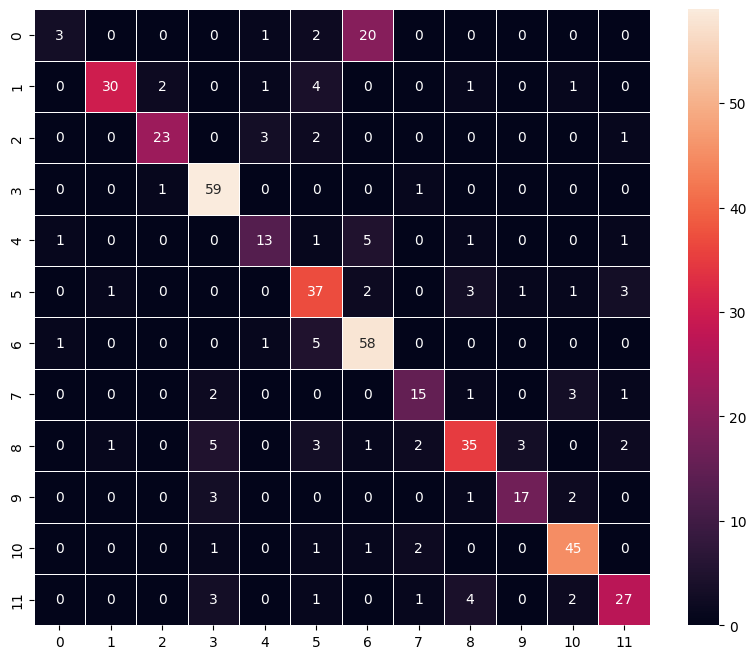

In [ ]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

<b> Observations</b><br>

- Now except class 0, every other class has it's focus on the principal diagonal.
- Although the percentage of accuracy on most assertive classes was lesser, the decrease is highly compensated with the higher accuracy on other classes.

#### Let's check it in terms of percentage to clarify the numbers

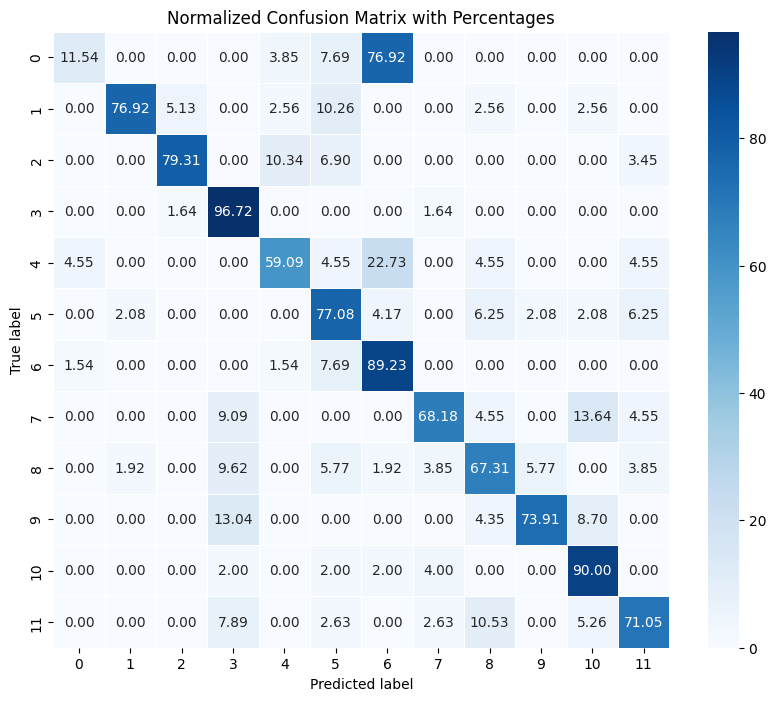

In [ ]:
from sklearn.metrics import confusion_matrix as sk_confusion_matrix

# Assuming y_test_encoded and y_pred are already defined
# Example:
# y_test_encoded = tf.keras.utils.to_categorical(y_test, num_classes)
# y_pred = model.predict(x_test)

# Obtain the categorical values from y_test_encoded and y_pred
y_pred_arg = np.argmax(y_pred, axis=1)
y_test_arg = np.argmax(y_test_encoded, axis=1)

# Compute the confusion matrix using sklearn's confusion_matrix function
conf_matrix = sk_confusion_matrix(y_test_arg, y_pred_arg)

# Normalize the confusion matrix by row (i.e., by the number of samples in each actual class)
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Convert to percentage
conf_matrix_percentage = conf_matrix_normalized * 100

# Plot the normalized confusion matrix
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    conf_matrix_percentage,
    annot=True,
    fmt=".2f",  # Display values as floating-point numbers with 2 decimal places
    linewidths=.4,
    square=True,
    cmap="Blues",  # Choose a color map
    ax=ax
)
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
ax.set_title('Normalized Confusion Matrix with Percentages')

plt.show()

- Class 0 is being classified as class 6 76% of the times, it decreases respect previous model, but still is to high.
- Every other class, except 4, is predicted with a +0,70% accuracy
- Even some classes are reaching 0.90% of accuracy+
- Still, there's margin to improve.

## **Model 7**

Now that we discover that model couldn't learn because of the amount of neurons that model had, we are going to add two more layers to check if there's still margin of improvement, and then we are going to use data augmentation and transfer learning architectures.

I'm taking it slowly because I'm not having access to google colab GPUs

First, we need to clear the previous model's history from the session even if a single model can run multiple times on the same data.

In [ ]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
# Fixing the seed for random number generators
import random
np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

In [ ]:
# Intializing a sequential model
model_7 = Sequential()

# Adding first conv layer with 128 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
model_7.add(Conv2D(128, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))
# Adding max pooling to reduce the size of output of first conv layer
model_7.add(MaxPooling2D((2, 2), padding = 'same'))
model_7.add(Dropout(0.25))

model_7.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model_7.add(MaxPooling2D((2, 2), padding = 'same'))
model_7.add(Dropout(0.25))

model_7.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model_7.add(MaxPooling2D((2, 2), padding = 'same'))
model_7.add(Dropout(0.25))

model_7.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model_7.add(MaxPooling2D((2, 2), padding = 'same'))
model_7.add(Dropout(0.25))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model_7.add(Flatten())

# Adding a fully connected dense layer with 32 neurons
model_7.add(Dense(32, activation='relu'))
# Adding a fully connected dense layer with 16 neurons
model_7.add(Dense(16, activation='relu'))
# Adding a fully connected dense layer with 8 neurons
model_7.add(Dense(8, activation='relu'))

# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
model_7.add(Dense(12, activation='softmax'))

# Using Adam Optimizer
opt = Adam()

# Compile model
model_7.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model_7.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 128)       0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 32, 32, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0

### <b> Fitting the model on the train data

In [ ]:
history_7 = model_7.fit(
            X_train_normalized, y_train_encoded,
            epochs=30,
            validation_data=(X_val_normalized,y_val_encoded),
            batch_size=32,
            verbose=2
)

Epoch 1/30
121/121 - 101s - loss: 2.4570 - accuracy: 0.1295 - val_loss: 2.4464 - val_accuracy: 0.1285 - 101s/epoch - 836ms/step
Epoch 2/30
121/121 - 95s - loss: 2.4359 - accuracy: 0.1235 - val_loss: 2.4304 - val_accuracy: 0.1332 - 95s/epoch - 785ms/step
Epoch 3/30
121/121 - 116s - loss: 2.4223 - accuracy: 0.1500 - val_loss: 2.4056 - val_accuracy: 0.1332 - 116s/epoch - 959ms/step
Epoch 4/30
121/121 - 92s - loss: 2.2642 - accuracy: 0.2563 - val_loss: 2.1460 - val_accuracy: 0.3178 - 92s/epoch - 761ms/step
Epoch 5/30
121/121 - 91s - loss: 1.9920 - accuracy: 0.3390 - val_loss: 1.8277 - val_accuracy: 0.3808 - 91s/epoch - 752ms/step
Epoch 6/30
121/121 - 92s - loss: 1.7546 - accuracy: 0.3741 - val_loss: 1.6887 - val_accuracy: 0.4206 - 92s/epoch - 757ms/step
Epoch 7/30
121/121 - 94s - loss: 1.6505 - accuracy: 0.4159 - val_loss: 1.6547 - val_accuracy: 0.4603 - 94s/epoch - 773ms/step
Epoch 8/30
121/121 - 91s - loss: 1.5893 - accuracy: 0.4492 - val_loss: 1.5493 - val_accuracy: 0.4766 - 91s/epoch -

### **Model Evaluation**

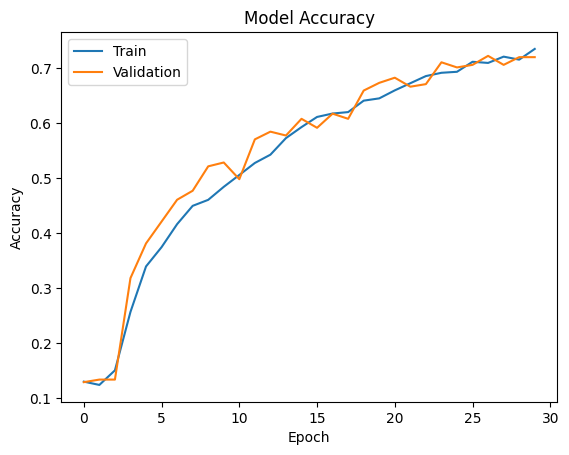

In [ ]:
plt.plot(history_7.history['accuracy'])
plt.plot(history_7.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations:**


*   Now we can see that **training accuracy** of the model **goes down to .73** and **validation accuracy** also **decrease to .72**.
*   Model continues generalizing, but in this case the level of accuracy is worst than previous model.
* New layers doesn't improve model performance.







### **Evaluating the model on test data**

In [ ]:
accuracy = model_7.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 4s - loss: 0.8594 - accuracy: 0.7032 - 4s/epoch - 287ms/step


Accuracy on test has decreased by 8 points from our previous best. We are not going to check on confusion matrix

## Model Performance Improvement

**Reducing the Learning Rate:**

**Hint**: Use **ReduceLRonPlateau()** function that will be used to decrease the learning rate by some factor, if the loss is not decreasing for some time. This may start decreasing the loss at a smaller learning rate. There is a possibility that the loss may still not decrease. This may lead to executing the learning rate reduction again in an attempt to achieve a lower loss.

In [ ]:
# Code to monitor val_accuracy
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

## **Model 8**

### **Data Augmentation**

Remember, **data augmentation should not be used in the validation/test data set**.

Let's check our best model with data augmentation and changing to SGD optimizer

First, we need to clear the previous model's history from the session even if a single model can run multiple times on the same data.

In [ ]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
# Fixing the seed for random number generators
import random
np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

In [ ]:
# Setting the rotation_range to 60
train_datagen = ImageDataGenerator(
                              rotation_range=60,
                              fill_mode='nearest'
                              )

In [ ]:
# Intializing a sequential model
model_8 = Sequential()

# Adding first conv layer with 128 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
model_8.add(Conv2D(128, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))
# Adding max pooling to reduce the size of output of first conv layer
model_8.add(MaxPooling2D((2, 2), padding = 'same'))
model_8.add(Dropout(0.25))

model_8.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model_8.add(MaxPooling2D((2, 2), padding = 'same'))
model_8.add(Dropout(0.25))

model_8.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model_8.add(MaxPooling2D((2, 2), padding = 'same'))
model_8.add(Dropout(0.25))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model_8.add(Flatten())

# Adding a fully connected dense layer with 32 neurons
model_8.add(Dense(32, activation='relu'))
# Adding a fully connected dense layer with 16 neurons
model_8.add(Dense(16, activation='relu'))

# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
model_8.add(Dense(12, activation='softmax'))

# Using SGD Optimizer
opt = SGD()

# Compile model
model_8.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model_8.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 128)       0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 32, 32, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0

### <b> Fitting the model on the train data

In [ ]:
history_8 = model_8.fit(
            train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=32,
                                       shuffle=False),
                                       epochs=15,
                                       steps_per_epoch=X_train_normalized.shape[0] // 32,
                                       validation_data=(X_val_normalized,y_val_encoded),
                                       verbose=1,callbacks=[learning_rate_reduction])

Epoch 1/15
120/120 [==============================] - 96s 781ms/step - loss: 2.4490 - accuracy: 0.1004 - val_loss: 2.4389 - val_accuracy: 0.1379 - lr: 0.0100
Epoch 2/15
120/120 [==============================] - 107s 890ms/step - loss: 2.4310 - accuracy: 0.1324 - val_loss: 2.4328 - val_accuracy: 0.1379 - lr: 0.0100
Epoch 3/15
120/120 [==============================] - 89s 741ms/step - loss: 2.4242 - accuracy: 0.1368 - val_loss: 2.4292 - val_accuracy: 0.1565 - lr: 0.0100
Epoch 4/15
120/120 [==============================] - 89s 741ms/step - loss: 2.4183 - accuracy: 0.1402 - val_loss: 2.4239 - val_accuracy: 0.1729 - lr: 0.0100
Epoch 5/15
120/120 [==============================] - 89s 742ms/step - loss: 2.4130 - accuracy: 0.1392 - val_loss: 2.4231 - val_accuracy: 0.1332 - lr: 0.0100
Epoch 6/15
120/120 [==============================] - 90s 749ms/step - loss: 2.4102 - accuracy: 0.1415 - val_loss: 2.4110 - val_accuracy: 0.1589 - lr: 0.0100
Epoch 7/15
120/120 [==============================]

### **Model Evaluation**

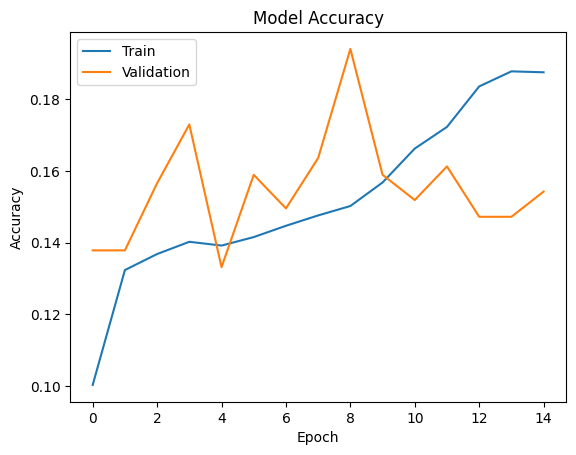

In [ ]:
plt.plot(history_8.history['accuracy'])
plt.plot(history_8.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations:**


*   Model is **really unstable** and **performance decreases notably to .20**.
*   Model goes worse with this modifications, but still is margin to modify parameters.








### **Evaluating the model on test data**

In [ ]:
accuracy = model_8.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 2s - loss: 2.3745 - accuracy: 0.1726 - 2s/epoch - 152ms/step


This is our worst model, obviously we are not going to check on confusion matrix.

## **Model 9**

We saw that SGD didn't work and this level of image rotation was too severe. Let's return to Adam optimizer and decrease rotation.

First, we need to clear the previous model's history from the session even if a single model can run multiple times on the same data.

In [ ]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
# Fixing the seed for random number generators
import random
np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

In [ ]:
# Setting the rotation_range to 15
train_datagen = ImageDataGenerator(
                              rotation_range=15,
                              fill_mode='nearest'
                              )

In [ ]:
# Intializing a sequential model
model_9 = Sequential()

# Adding first conv layer with 128 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
model_9.add(Conv2D(128, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))
# Adding max pooling to reduce the size of output of first conv layer
model_9.add(MaxPooling2D((2, 2), padding = 'same'))
model_9.add(Dropout(0.25))

model_9.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model_9.add(MaxPooling2D((2, 2), padding = 'same'))
model_9.add(Dropout(0.25))

model_9.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model_9.add(MaxPooling2D((2, 2), padding = 'same'))
model_9.add(Dropout(0.25))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model_9.add(Flatten())

# Adding a fully connected dense layer with 32 neurons
model_9.add(Dense(32, activation='relu'))
# Adding a fully connected dense layer with 16 neurons
model_9.add(Dense(16, activation='relu'))

# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
model_9.add(Dense(12, activation='softmax'))

# Using Adam Optimizer
opt = Adam()

# Compile model
model_9.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model_9.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 128)       0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 32, 32, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0

### <b> Fitting the model on the train data

In [ ]:
history_9 = model_9.fit(
            train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=32,
                                       shuffle=False),
                                       epochs=15,
                                       steps_per_epoch=X_train_normalized.shape[0] // 32,
                                       validation_data=(X_val_normalized,y_val_encoded),
                                       verbose=1,callbacks=[learning_rate_reduction])

Epoch 1/15
120/120 [==============================] - 93s 760ms/step - loss: 2.4414 - accuracy: 0.1216 - val_loss: 2.4194 - val_accuracy: 0.1379 - lr: 0.0010
Epoch 2/15
120/120 [==============================] - 107s 885ms/step - loss: 2.3777 - accuracy: 0.1730 - val_loss: 2.2341 - val_accuracy: 0.2710 - lr: 0.0010
Epoch 3/15
120/120 [==============================] - 90s 754ms/step - loss: 1.9898 - accuracy: 0.3284 - val_loss: 1.8611 - val_accuracy: 0.3341 - lr: 0.0010
Epoch 4/15
120/120 [==============================] - 87s 726ms/step - loss: 1.6683 - accuracy: 0.3979 - val_loss: 1.5822 - val_accuracy: 0.3621 - lr: 0.0010
Epoch 5/15
120/120 [==============================] - 85s 710ms/step - loss: 1.5241 - accuracy: 0.4438 - val_loss: 1.4535 - val_accuracy: 0.4907 - lr: 0.0010
Epoch 6/15
120/120 [==============================] - 89s 739ms/step - loss: 1.4677 - accuracy: 0.4663 - val_loss: 1.4318 - val_accuracy: 0.4813 - lr: 0.0010
Epoch 7/15
120/120 [==============================]

### **Model Evaluation**

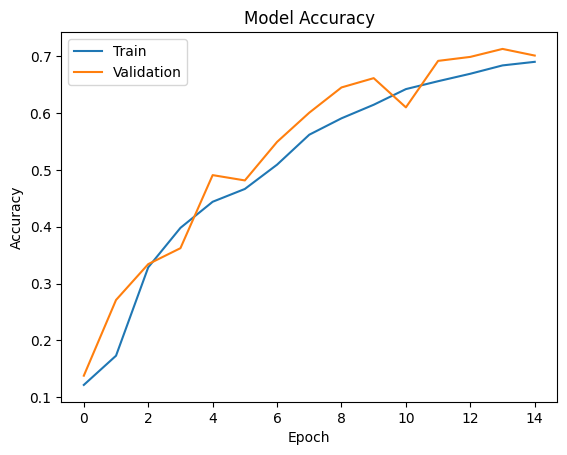

In [ ]:
plt.plot(history_9.history['accuracy'])
plt.plot(history_9.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations:**


*   Model performance **improved** and **performance goes back to previous levels**.
*   Because of less epochs model doesn't reach it's previous potential.
*   Also previous model has a similar tendency. I want to check what happens with more epochs, so we are going to try it.







### **Evaluating the model on test data**

In [ ]:
accuracy = model_9.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 3s - loss: 0.9482 - accuracy: 0.6737 - 3s/epoch - 194ms/step


We are still having similar results than before finding the best model

### <b> Fitting the model on the train data

In [ ]:
history_9b = model_9.fit(
            train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=32,
                                       shuffle=False),
                                       epochs=30,
                                       steps_per_epoch=X_train_normalized.shape[0] // 32,
                                       validation_data=(X_val_normalized,y_val_encoded),
                                       verbose=1,callbacks=[learning_rate_reduction])

Epoch 1/30
120/120 [==============================] - 99s 825ms/step - loss: 0.9033 - accuracy: 0.6936 - val_loss: 0.9733 - val_accuracy: 0.6519 - lr: 0.0010
Epoch 2/30
120/120 [==============================] - 85s 712ms/step - loss: 0.8782 - accuracy: 0.7012 - val_loss: 0.8440 - val_accuracy: 0.7290 - lr: 0.0010
Epoch 3/30
120/120 [==============================] - 88s 732ms/step - loss: 0.8574 - accuracy: 0.7114 - val_loss: 0.8069 - val_accuracy: 0.7360 - lr: 0.0010
Epoch 4/30
120/120 [==============================] - 89s 744ms/step - loss: 0.8203 - accuracy: 0.7140 - val_loss: 0.7872 - val_accuracy: 0.7570 - lr: 0.0010
Epoch 5/30
120/120 [==============================] - 84s 703ms/step - loss: 0.8418 - accuracy: 0.7122 - val_loss: 0.7938 - val_accuracy: 0.7453 - lr: 0.0010
Epoch 6/30
120/120 [==============================] - 85s 710ms/step - loss: 0.7969 - accuracy: 0.7206 - val_loss: 0.7646 - val_accuracy: 0.7570 - lr: 0.0010
Epoch 7/30
120/120 [==============================] 

### **Model Evaluation**

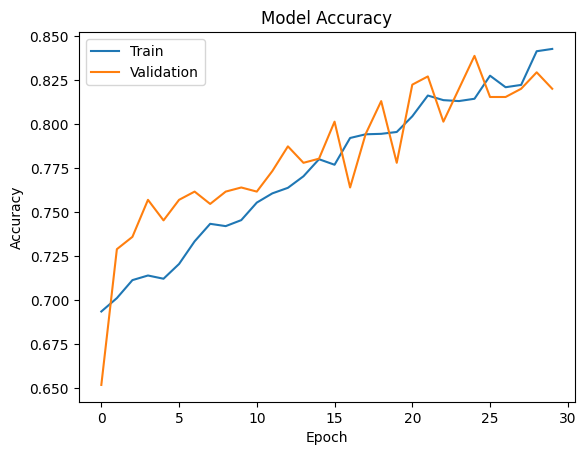

In [ ]:
plt.plot(history_9b.history['accuracy'])
plt.plot(history_9b.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations:**


*   Model performance **continuous to improve** as the epochs goes by but here we don't reiniciate model, so the epoch to see is number 15 and **performance is a little bit lower** than our previous best model.
*   It looks like if we continue adding epochs model will improve, being different than our previous best where tendency was flattening at the end.
*   Model still is generalizing and we have better results.
*   Let's add 10 more epochs as final check to see if we can get the 0.90 accuracy







### **Evaluating the model on test data**

In [ ]:
accuracy = model_9.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 6s - loss: 0.7064 - accuracy: 0.7874 - 6s/epoch - 429ms/step


On test data, the improvement compared to our best model is about 2 points, but with 15 more epochs.

### <b> Fitting the model on the train data

In [ ]:
history_9c = model_9.fit(
            train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=32,
                                       shuffle=False),
                                       epochs=10,
                                       steps_per_epoch=X_train_normalized.shape[0] // 32,
                                       validation_data=(X_val_normalized,y_val_encoded),
                                       verbose=1,callbacks=[learning_rate_reduction])

Epoch 1/10
120/120 [==============================] - 93s 774ms/step - loss: 0.4271 - accuracy: 0.8516 - val_loss: 0.5367 - val_accuracy: 0.8388 - lr: 5.0000e-04
Epoch 2/10
120/120 [==============================] - 88s 738ms/step - loss: 0.4274 - accuracy: 0.8522 - val_loss: 0.5434 - val_accuracy: 0.8388 - lr: 5.0000e-04
Epoch 3/10
120/120 [==============================] - 85s 708ms/step - loss: 0.4197 - accuracy: 0.8529 - val_loss: 0.5471 - val_accuracy: 0.8411 - lr: 5.0000e-04
Epoch 4/10
120/120 [==============================] - 88s 734ms/step - loss: 0.4033 - accuracy: 0.8595 - val_loss: 0.5330 - val_accuracy: 0.8481 - lr: 5.0000e-04
Epoch 5/10
120/120 [==============================] - 85s 708ms/step - loss: 0.4073 - accuracy: 0.8571 - val_loss: 0.5804 - val_accuracy: 0.8131 - lr: 5.0000e-04
Epoch 6/10
120/120 [==============================] - 86s 721ms/step - loss: 0.4012 - accuracy: 0.8592 - val_loss: 0.5460 - val_accuracy: 0.8341 - lr: 5.0000e-04
Epoch 7/10
120/120 [========

### **Model Evaluation**

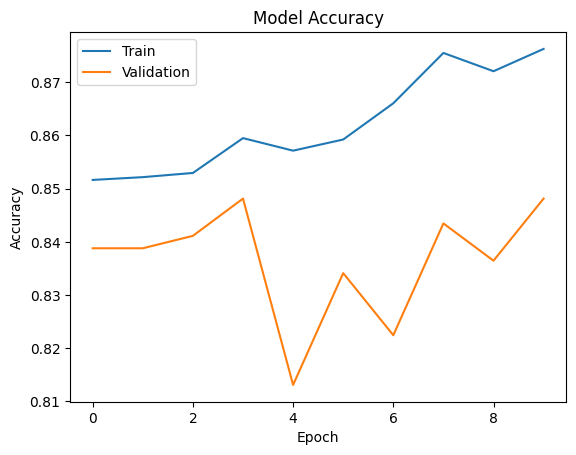

In [ ]:
plt.plot(history_9c.history['accuracy'])
plt.plot(history_9c.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations:**


*   Model performance **is still improving**.
*   It looks like if we continue adding epochs training set will continue to improve, but validation not.
*   Model generalization appears to decrease a little bit.








### **Evaluating the model on test data**

In [ ]:
accuracy = model_9.evaluate(X_test_normalized, y_test_encoded, verbose=1)

15/15 [==============================] - 2s 155ms/step - loss: 0.6479 - accuracy: 0.8126


On testing set, model still improves to 0.81% being our best result till now, but with a lot of computational cost.

Let's check the confusion matrix

### **Generating the predictions using test data**

In [ ]:
# Here we would get the output as probablities for each category
y_pred=model_9.predict(X_test_normalized)

15/15 [==============================] - 5s 250ms/step


In [ ]:
y_pred

array([[1.3378177e-02, 3.4951796e-07, 9.4604288e-04, ..., 1.1904255e-05,
        3.9625991e-02, 4.5848560e-01],
       [2.9246729e-07, 2.7340675e-02, 9.0221940e-05, ..., 1.5437194e-02,
        9.5456821e-01, 8.2117901e-04],
       [2.4525618e-05, 2.2773825e-09, 2.6834728e-06, ..., 1.5954537e-04,
        3.0065680e-06, 3.3436676e-03],
       ...,
       [8.8359286e-07, 9.2854261e-01, 6.9607295e-02, ..., 7.8693070e-09,
        1.0021242e-05, 2.1709371e-05],
       [2.8632066e-13, 7.5203868e-13, 1.3970787e-11, ..., 4.9149847e-05,
        9.8682818e-08, 9.4987961e-05],
       [1.8693134e-04, 7.1238886e-05, 5.5620197e-02, ..., 2.1438315e-03,
        1.4769685e-04, 8.7013602e-01]], dtype=float32)

### **Plotting the Confusion Matrix**

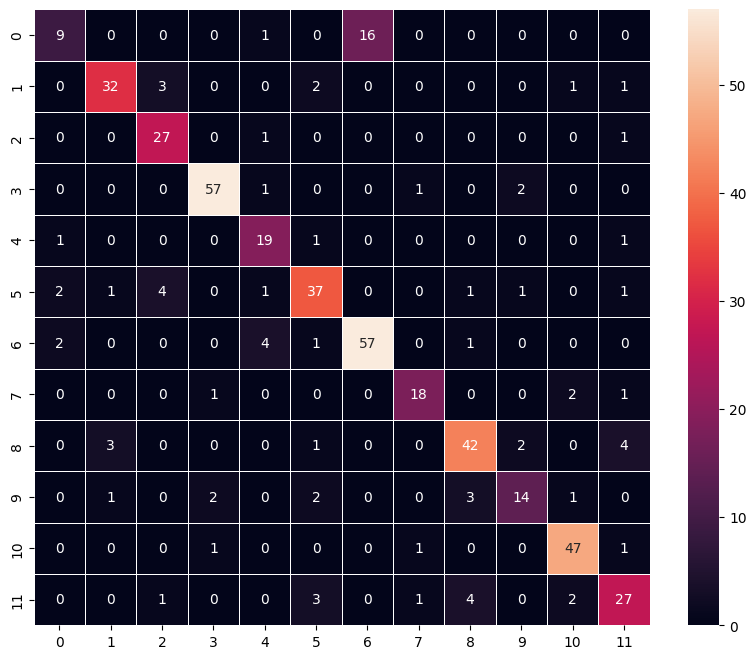

In [ ]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

<b> Observations</b><br>

- Class 0 improves, but still is most classified as class 6.
- Class 9 is also the other class which is most misclassified and decreases vs previous model.
- Besides this two issues, model performance improves notabily. Let's see it in terms of percentage.

#### Let's check it in terms of percentage to clarify the numbers

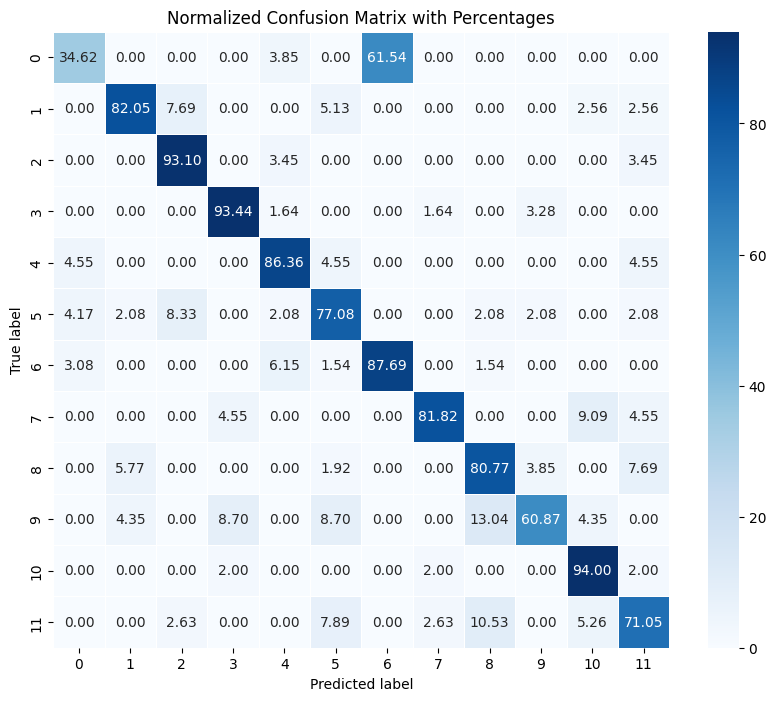

In [ ]:
from sklearn.metrics import confusion_matrix as sk_confusion_matrix

# Obtain the categorical values from y_test_encoded and y_pred
y_pred_arg = np.argmax(y_pred, axis=1)
y_test_arg = np.argmax(y_test_encoded, axis=1)

# Compute the confusion matrix using sklearn's confusion_matrix function
conf_matrix = sk_confusion_matrix(y_test_arg, y_pred_arg)

# Normalize the confusion matrix by row (i.e., by the number of samples in each actual class)
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Convert to percentage
conf_matrix_percentage = conf_matrix_normalized * 100

# Plot the normalized confusion matrix
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    conf_matrix_percentage,
    annot=True,
    fmt=".2f",  # Display values as floating-point numbers with 2 decimal places
    linewidths=.4,
    square=True,
    cmap="Blues",  # Choose a color map
    ax=ax
)
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
ax.set_title('Normalized Confusion Matrix with Percentages')

plt.show()

Previous observations (model 6)

- Class 0 is being classified as class 6 76% of the times, it decreases respect previous model, but still is to high.
- Every other class, except 4, is predicted with a +0,70% accuracy
- Even some classes are reaching 0.90% of accuracy+
- Still, there's margin to improve.

**Observations of the current model**

- Class 0 is being classified as class 6 62% of the times, it has improved, but there's work to do still.
- Class 4 improved (previous 59%), but class 9 has decreased (previous 74%), compensating it.
- Almost evey other class has set their floor at 80%, and now are new classes over 90%
- Still, there's margin to improve.

## **Model 10**

After having good results in previous model but with higher computational costs, we are going to go deeper on data augmentation.

From now, we are going to establish 30 as the fixed epoch to be fair with every other model and only if there's one who has better results we are going to train it on more epochs.

First, we need to clear the previous model's history from the session even if a single model can run multiple times on the same data.

In [ ]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
# Fixing the seed for random number generators
import random
np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

In [ ]:
# Setting the rotation_range to 15, adding width shift, height shift and zoom range.
train_datagen = ImageDataGenerator(
                              rotation_range=15,
                              width_shift_range=0.2,
                              height_shift_range=0.2,
                              zoom_range=0.2,
                              fill_mode='nearest'
                              )

In [ ]:
# Intializing a sequential model
model_10 = Sequential()

# Adding first conv layer with 128 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
model_10.add(Conv2D(128, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))
# Adding max pooling to reduce the size of output of first conv layer
model_10.add(MaxPooling2D((2, 2), padding = 'same'))
model_10.add(Dropout(0.25))

model_10.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model_10.add(MaxPooling2D((2, 2), padding = 'same'))
model_10.add(Dropout(0.25))

model_10.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model_10.add(MaxPooling2D((2, 2), padding = 'same'))
model_10.add(Dropout(0.25))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model_10.add(Flatten())

# Adding a fully connected dense layer with 32 neurons
model_10.add(Dense(32, activation='relu'))
# Adding a fully connected dense layer with 16 neurons
model_10.add(Dense(16, activation='relu'))

# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
model_10.add(Dense(12, activation='softmax'))

# Using Adam Optimizer
opt = Adam()

# Compile model
model_10.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model_10.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 128)       0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 32, 32, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0

### <b> Fitting the model on the train data

In [ ]:
history_10 = model_10.fit(
            train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=32,
                                       shuffle=False),
                                       epochs=30,
                                       steps_per_epoch=X_train_normalized.shape[0] // 32,
                                       validation_data=(X_val_normalized,y_val_encoded),
                                       verbose=1,callbacks=[learning_rate_reduction])

Epoch 1/30
120/120 [==============================] - 96s 783ms/step - loss: 2.4358 - accuracy: 0.1318 - val_loss: 2.4195 - val_accuracy: 0.1379 - lr: 0.0010
Epoch 2/30
120/120 [==============================] - 89s 742ms/step - loss: 2.4157 - accuracy: 0.1444 - val_loss: 2.4188 - val_accuracy: 0.1495 - lr: 0.0010
Epoch 3/30
120/120 [==============================] - 87s 729ms/step - loss: 2.3202 - accuracy: 0.2121 - val_loss: 2.1667 - val_accuracy: 0.2547 - lr: 0.0010
Epoch 4/30
120/120 [==============================] - 88s 726ms/step - loss: 1.9804 - accuracy: 0.2889 - val_loss: 1.9300 - val_accuracy: 0.2897 - lr: 0.0010
Epoch 5/30
120/120 [==============================] - 88s 730ms/step - loss: 1.8371 - accuracy: 0.3256 - val_loss: 1.6717 - val_accuracy: 0.4112 - lr: 0.0010
Epoch 6/30
120/120 [==============================] - 87s 723ms/step - loss: 1.7283 - accuracy: 0.3628 - val_loss: 1.6434 - val_accuracy: 0.4276 - lr: 0.0010
Epoch 7/30
120/120 [==============================] 

### **Model Evaluation**

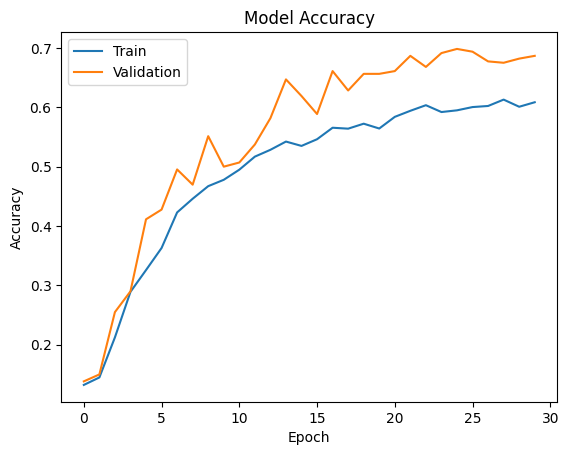

In [ ]:
plt.plot(history_10.history['accuracy'])
plt.plot(history_10.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations:**


*   Model performance **have not improved** and **performance goes back to previous levels**.
*   Model couldn't get it's previous performance. Probably with new data augmentation model needs more epochs to learn or this parameters are too aggresive.







### **Evaluating the model on test data**

In [ ]:
accuracy = model_10.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 3s - loss: 0.9482 - accuracy: 0.6737 - 3s/epoch - 194ms/step


We are still having similar results than before finding the best model

## **Model 11**

It seems that data augmentation was too abrupt for the model to learn, so we are going modify this and do some slightly changes on this parameters.
Also we are going to increase the batch sizes to try to reduce noise on data.

First, we need to clear the previous model's history from the session even if a single model can run multiple times on the same data.

In [ ]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
# Fixing the seed for random number generators
import random
np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

In [ ]:
# Setting the rotation_range to 10, reducing width shift, height shift and zoom range.
train_datagen = ImageDataGenerator(
                              rotation_range=10,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              zoom_range=0.1,
                              fill_mode='nearest'
                              )

In [ ]:
# Intializing a sequential model
model_11 = Sequential()

# Adding first conv layer with 128 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
model_11.add(Conv2D(128, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))
# Adding max pooling to reduce the size of output of first conv layer
model_11.add(MaxPooling2D((2, 2), padding = 'same'))
model_11.add(Dropout(0.25))

model_11.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model_11.add(MaxPooling2D((2, 2), padding = 'same'))
model_11.add(Dropout(0.25))

model_11.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model_11.add(MaxPooling2D((2, 2), padding = 'same'))
model_11.add(Dropout(0.25))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model_11.add(Flatten())

# Adding a fully connected dense layer with 32 neurons
model_11.add(Dense(32, activation='relu'))
# Adding a fully connected dense layer with 16 neurons
model_11.add(Dense(16, activation='relu'))

# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
model_11.add(Dense(12, activation='softmax'))

# Using Adam Optimizer
opt = Adam()

# Compile model
model_11.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model_11.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 64, 64, 128)       3584      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 32, 32, 128)       0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 32, 32, 128)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 64)        73792     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 16, 16, 64)       

### <b> Fitting the model on the train data

In [ ]:
history_11 = model_11.fit(
            train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=64,
                                       shuffle=False),
                                       epochs=30,
                                       steps_per_epoch=X_train_normalized.shape[0] // 64,
                                       validation_data=(X_val_normalized,y_val_encoded),
                                       verbose=1,callbacks=[learning_rate_reduction])

Epoch 1/30
60/60 [==============================] - 104s 2s/step - loss: 2.4753 - accuracy: 0.0983 - val_loss: 2.4685 - val_accuracy: 0.1028 - lr: 0.0010
Epoch 2/30
60/60 [==============================] - 86s 1s/step - loss: 2.4194 - accuracy: 0.1541 - val_loss: 2.3692 - val_accuracy: 0.1636 - lr: 0.0010
Epoch 3/30
60/60 [==============================] - 86s 1s/step - loss: 2.2805 - accuracy: 0.2006 - val_loss: 2.1599 - val_accuracy: 0.2453 - lr: 0.0010
Epoch 4/30
60/60 [==============================] - 89s 1s/step - loss: 2.0827 - accuracy: 0.2628 - val_loss: 1.9833 - val_accuracy: 0.2921 - lr: 0.0010
Epoch 5/30
60/60 [==============================] - 89s 1s/step - loss: 1.9058 - accuracy: 0.3328 - val_loss: 1.8077 - val_accuracy: 0.3879 - lr: 0.0010
Epoch 6/30
60/60 [==============================] - 86s 1s/step - loss: 1.7777 - accuracy: 0.3756 - val_loss: 1.8289 - val_accuracy: 0.3598 - lr: 0.0010
Epoch 7/30
60/60 [==============================] - 87s 1s/step - loss: 1.6674 - 

### **Model Evaluation**

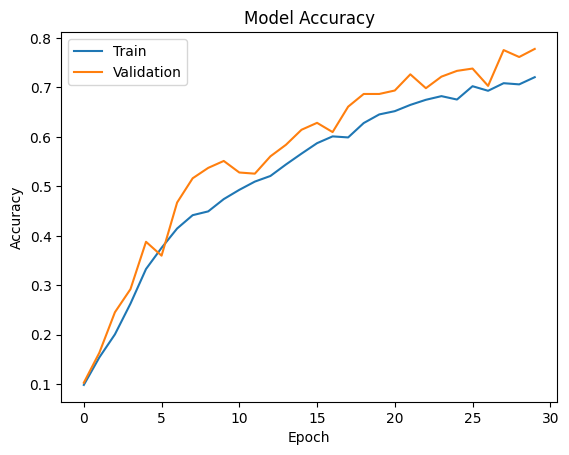

In [ ]:
plt.plot(history_11.history['accuracy'])
plt.plot(history_11.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations:**


*   Model performance **have improved** compared to previous models but still **doesn't perform as our best model**.
*   Although, the tendency looks like that with more epochs model could be even better.
*   Also, looks like batch normalization helps on reducing noise.





### **Evaluating the model on test data**

In [ ]:
accuracy = model_11.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 2s - loss: 0.7893 - accuracy: 0.7537 - 2s/epoch - 156ms/step


We are having a similar result as our best model

## **Model 12**

Now we add other variables on data augmentation

In [ ]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
# Fixing the seed for random number generators
import random
np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

In [ ]:
# Setting the rotation_range to 10, reducing width shift, height shift and zoom range.
train_datagen = ImageDataGenerator(
    rotation_range=5,
    width_shift_range=0.05,
    height_shift_range=0.05,
    zoom_range=0.05,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.2, 0.4],
    channel_shift_range=0.1,
    fill_mode='nearest'
                              )

In [ ]:
# Intializing a sequential model
model_12 = Sequential()

# Adding first conv layer with 128 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
model_12.add(Conv2D(128, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))
# Adding max pooling to reduce the size of output of first conv layer
model_12.add(MaxPooling2D((2, 2), padding = 'same'))
model_12.add(Dropout(0.25))

model_12.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model_12.add(MaxPooling2D((2, 2), padding = 'same'))
model_12.add(Dropout(0.25))

model_12.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model_12.add(MaxPooling2D((2, 2), padding = 'same'))
model_12.add(Dropout(0.25))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model_12.add(Flatten())

# Adding a fully connected dense layer with 32 neurons
model_12.add(Dense(32, activation='relu'))
# Adding a fully connected dense layer with 16 neurons
model_12.add(Dense(16, activation='relu'))

# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
model_12.add(Dense(12, activation='softmax'))

# Using Adam Optimizer
opt = Adam()

# Compile model
model_12.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model_12.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 128)       0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 32, 32, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0

### <b> Fitting the model on the train data

In [ ]:
history_12 = model_12.fit(
            train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=64,
                                       shuffle=True),
                                       epochs=30,
                                       steps_per_epoch=X_train_normalized.shape[0] // 64,
                                       validation_data=(X_val_normalized,y_val_encoded),
                                       verbose=1,callbacks=[learning_rate_reduction])

Epoch 1/30
60/60 [==============================] - 87s 1s/step - loss: 2.4694 - accuracy: 0.1322 - val_loss: 2.4599 - val_accuracy: 0.1402 - lr: 0.0010
Epoch 2/30
60/60 [==============================] - 89s 1s/step - loss: 2.4592 - accuracy: 0.1388 - val_loss: 2.4513 - val_accuracy: 0.1379 - lr: 0.0010
Epoch 3/30
60/60 [==============================] - 135s 2s/step - loss: 2.4511 - accuracy: 0.1369 - val_loss: 2.4448 - val_accuracy: 0.1379 - lr: 0.0010
Epoch 4/30
60/60 [==============================] - ETA: 0s - loss: 2.4445 - accuracy: 0.1380
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
60/60 [==============================] - 142s 2s/step - loss: 2.4445 - accuracy: 0.1380 - val_loss: 2.4390 - val_accuracy: 0.1379 - lr: 0.0010
Epoch 5/30
60/60 [==============================] - 140s 2s/step - loss: 2.4398 - accuracy: 0.1383 - val_loss: 2.4365 - val_accuracy: 0.1379 - lr: 5.0000e-04
Epoch 6/30
60/60 [==============================] - 140s 2s/step - lo

### **Model Evaluation**

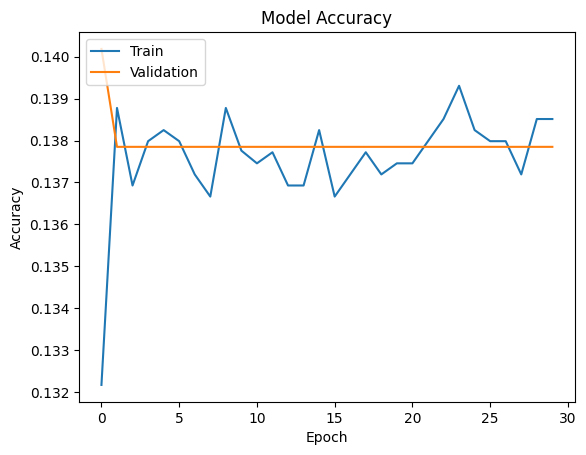

In [ ]:
plt.plot(history_12.history['accuracy'])
plt.plot(history_12.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations:**


*   Model performance **is the worst** till now.
*   Looks like data augmentation with the power of the model isn't helping.






### **Evaluating the model on test data**

In [ ]:
accuracy = model_12.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 3s - loss: 2.4262 - accuracy: 0.1368 - 3s/epoch - 195ms/step


Like in validation, test works badly.

## **Model 13**

Now that we've tried lot of models with data augmentation, let's do a step forward and try with transfer learning and check if model goes better.

In [ ]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
# Fixing the seed for random number generators
import random
np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

### Transfer Learning using VGG16

In [ ]:
from tensorflow.keras.models import Model
from keras.applications.vgg16 import VGG16

vgg_model = VGG16(weights='imagenet', include_top = False, input_shape = (64,64,3))
vgg_model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                              

In [ ]:
# Making all the layers of the VGG model non-trainable. i.e. freezing them
for layer in vgg_model.layers:
    layer.trainable = False

In [ ]:
model_13 = Sequential()

# Adding the convolutional part of the VGG16 model from above
model_13.add(vgg_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
model_13.add(Flatten())

# Adding a dense output layer
model_13.add(Dense(32, activation='relu'))
model_13.add(Dropout(0.2))
model_13.add(Dense(16, activation='relu'))
model_13.add(Dense(12, activation='softmax'))
opt=Adam()
# Compile model
model_13.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model_13.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_3 (Dense)             (None, 32)                65568     
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 12)                204       
                                                                 
Total params: 14780988 (56.38 MB)
Trainable params: 66

In [ ]:
# Epochs
epochs = 30
# Batch size
batch_size = 64

history_13 = model_13.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size,
                                       seed=1,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized,y_val_encoded),
                    verbose=1)

Epoch 1/30
60/60 [==============================] - 190s 3s/step - loss: 2.4771 - accuracy: 0.1182 - val_loss: 2.4649 - val_accuracy: 0.1379
Epoch 2/30
60/60 [==============================] - 297s 5s/step - loss: 2.4467 - accuracy: 0.1340 - val_loss: 2.4416 - val_accuracy: 0.1379
Epoch 3/30
60/60 [==============================] - 315s 5s/step - loss: 2.4322 - accuracy: 0.1372 - val_loss: 2.4346 - val_accuracy: 0.1355
Epoch 4/30
60/60 [==============================] - 313s 5s/step - loss: 2.4233 - accuracy: 0.1369 - val_loss: 2.4225 - val_accuracy: 0.1355
Epoch 5/30
60/60 [==============================] - 299s 5s/step - loss: 2.4269 - accuracy: 0.1319 - val_loss: 2.4209 - val_accuracy: 0.1425
Epoch 6/30
60/60 [==============================] - 300s 5s/step - loss: 2.4214 - accuracy: 0.1279 - val_loss: 2.4253 - val_accuracy: 0.1402
Epoch 7/30
60/60 [==============================] - 314s 5s/step - loss: 2.4264 - accuracy: 0.1277 - val_loss: 2.4205 - val_accuracy: 0.1379
Epoch 8/30
60

I'd just early stopped because model doesn't performs well and also is taking too much time. Even with a better architecture, the changes added with data augmentation doesn't allow the model to learn.

## **Model 14**

The two previous models showed us that with lot of data augmentation, even with better architecture, model didn't learn.

So, we are going to do a step back and check with the better data augmentation tuning that we've discovered on vgg16.

In [ ]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
# Fixing the seed for random number generators
import random
np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

In [ ]:
# Setting the rotation_range to 10, reducing width shift, height shift and zoom range.
train_datagen = ImageDataGenerator(
                              rotation_range=10,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              zoom_range=0.1,
                              fill_mode='nearest'
                              )

In [ ]:
model_14 = Sequential()

# Adding the convolutional part of the VGG16 model from above
model_14.add(vgg_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
model_14.add(Flatten())

# Adding a dense output layer
model_14.add(Dense(32, activation='relu'))
model_14.add(Dropout(0.2))
model_14.add(Dense(16, activation='relu'))
model_14.add(Dense(12, activation='softmax'))
opt=Adam()
# Compile model
model_14.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model_14.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 32)                65568     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 12)                204       
                                                                 
Total params: 14780988 (56.38 MB)
Trainable params: 6630

In [ ]:
# Epochs
epochs = 30
# Batch size
batch_size = 64

history_14 = model_14.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size,
                                       seed=1,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized,y_val_encoded),
                    verbose=1)

Epoch 1/30
60/60 [==============================] - 224s 4s/step - loss: 2.3615 - accuracy: 0.1586 - val_loss: 2.2191 - val_accuracy: 0.2220
Epoch 2/30
60/60 [==============================] - 236s 4s/step - loss: 2.1338 - accuracy: 0.2712 - val_loss: 1.9388 - val_accuracy: 0.3458
Epoch 3/30
60/60 [==============================] - 238s 4s/step - loss: 1.9375 - accuracy: 0.3397 - val_loss: 1.7579 - val_accuracy: 0.3738
Epoch 4/30
60/60 [==============================] - 236s 4s/step - loss: 1.8093 - accuracy: 0.3775 - val_loss: 1.6735 - val_accuracy: 0.3902
Epoch 5/30
60/60 [==============================] - 236s 4s/step - loss: 1.7352 - accuracy: 0.3976 - val_loss: 1.6071 - val_accuracy: 0.4159
Epoch 6/30
60/60 [==============================] - 237s 4s/step - loss: 1.6912 - accuracy: 0.4110 - val_loss: 1.5517 - val_accuracy: 0.4439
Epoch 7/30
60/60 [==============================] - 237s 4s/step - loss: 1.6333 - accuracy: 0.4362 - val_loss: 1.5161 - val_accuracy: 0.4533
Epoch 8/30
60

### **Model Evaluation**

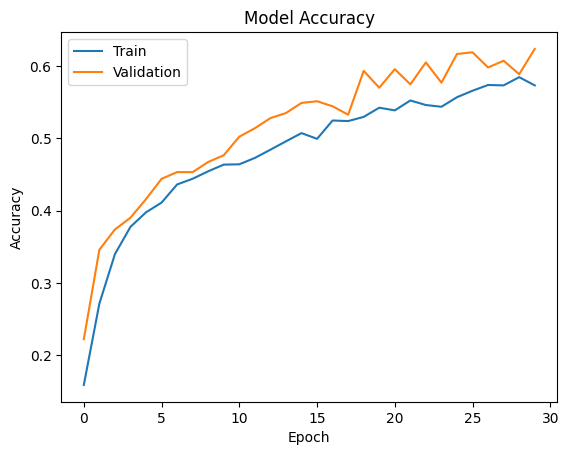

In [ ]:
plt.plot(history_14.history['accuracy'])
plt.plot(history_14.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations:**


*   Model performance **improves respect the previous two models** but still doesn't reach our model with the best perfomance.
*   Data augmentation isn't helping on this structure.






### **Evaluating the model on test data**

In [ ]:
accuracy = model_14.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 25s - loss: 1.1370 - accuracy: 0.5979 - 25s/epoch - 2s/step


We've also got a mediocre performance on test data

- Because of the time that it takes to run the model and poor performance, we are not going to insist on VGG16.

## **Model 15**

We have two similar perfomance models: 6 and 9. With the 9, we trained it with 10 more epochs than 6. So, in order to balance criteria, we are going to add 10 more epochs on this model and select the final model.

First, we need to clear the previous model's history from the session even if a single model can run multiple times on the same data.

In [ ]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
# Fixing the seed for random number generators
import random
np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

In [ ]:
# Intializing a sequential model
model_15 = Sequential()

# Adding first conv layer with 128 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
model_15.add(Conv2D(128, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))
# Adding max pooling to reduce the size of output of first conv layer
model_15.add(MaxPooling2D((2, 2), padding = 'same'))
model_15.add(Dropout(0.25))

model_15.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model_15.add(MaxPooling2D((2, 2), padding = 'same'))
model_15.add(Dropout(0.25))

model_15.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model_15.add(MaxPooling2D((2, 2), padding = 'same'))
model_15.add(Dropout(0.25))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model_15.add(Flatten())

# Adding a fully connected dense layer with 32 neurons
model_15.add(Dense(32, activation='relu'))
# Adding a fully connected dense layer with 16 neurons
model_15.add(Dense(16, activation='relu'))

# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
model_15.add(Dense(12, activation='softmax'))

# Using Adam Optimizer
opt = Adam()

# Compile model
model_15.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model_15.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 128)       0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 32, 32, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0

### <b> Fitting the model on the train data

In [ ]:
history_15 = model_15.fit(
            X_train_normalized, y_train_encoded,
            epochs=40,
            validation_data=(X_val_normalized,y_val_encoded),
            batch_size=32,
            verbose=2
)

Epoch 1/40
121/121 - 107s - loss: 2.4356 - accuracy: 0.1256 - val_loss: 2.4481 - val_accuracy: 0.1402 - 107s/epoch - 886ms/step
Epoch 2/40
121/121 - 93s - loss: 2.3091 - accuracy: 0.2173 - val_loss: 1.9850 - val_accuracy: 0.3551 - 93s/epoch - 772ms/step
Epoch 3/40
121/121 - 95s - loss: 1.7162 - accuracy: 0.4102 - val_loss: 1.5271 - val_accuracy: 0.4650 - 95s/epoch - 789ms/step
Epoch 4/40
121/121 - 93s - loss: 1.4596 - accuracy: 0.4786 - val_loss: 1.2777 - val_accuracy: 0.5771 - 93s/epoch - 771ms/step
Epoch 5/40
121/121 - 93s - loss: 1.2282 - accuracy: 0.5706 - val_loss: 1.2256 - val_accuracy: 0.5607 - 93s/epoch - 770ms/step
Epoch 6/40
121/121 - 92s - loss: 1.1421 - accuracy: 0.6007 - val_loss: 1.1011 - val_accuracy: 0.6285 - 92s/epoch - 763ms/step
Epoch 7/40
121/121 - 100s - loss: 1.0557 - accuracy: 0.6343 - val_loss: 1.1213 - val_accuracy: 0.6332 - 100s/epoch - 824ms/step
Epoch 8/40
121/121 - 94s - loss: 1.0031 - accuracy: 0.6525 - val_loss: 1.0044 - val_accuracy: 0.6986 - 94s/epoch -

### **Model Evaluation**

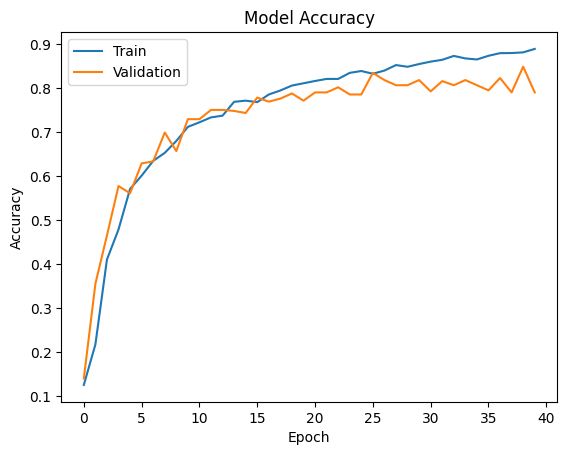

In [ ]:
plt.plot(history_15.history['accuracy'])
plt.plot(history_15.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations:**


*   Model has not improved as it was expected.
* As epochs goes by model starts to overfit. We see it on the separation between training and validation set.
*   Now we realize that model 9 is the best one under the same conditions.








### **Evaluating the model on test data**

In [ ]:
accuracy = model_15.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 3s - loss: 0.8925 - accuracy: 0.7537 - 3s/epoch - 228ms/step


Accuracy on test has stayed the same, even it decreased a little bit.

## **Model 16**

Let's do some final tunes on model before choosing it as our final model. On some of our previous models we realize that a little modification on rotation could improve accuracy and a bigger batch size also improved on avoid overfitting. Let's add it to our model. And if it goes right and looks like model on more epochs improves, we are going to add more epochs on next model.

In [ ]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
# Fixing the seed for random number generators
import random
np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

In [ ]:
# Setting the rotation_range to 10
train_datagen = ImageDataGenerator(
                              rotation_range=10,
                              fill_mode='nearest'
                              )

In [ ]:
# Intializing a sequential model
model_16 = Sequential()

# Adding first conv layer with 128 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
model_16.add(Conv2D(128, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))
# Adding max pooling to reduce the size of output of first conv layer
model_16.add(MaxPooling2D((2, 2), padding = 'same'))
model_16.add(Dropout(0.25))

model_16.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model_16.add(MaxPooling2D((2, 2), padding = 'same'))
model_16.add(Dropout(0.25))

model_16.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model_16.add(MaxPooling2D((2, 2), padding = 'same'))
model_16.add(Dropout(0.25))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model_16.add(Flatten())

# Adding a fully connected dense layer with 32 neurons
model_16.add(Dense(32, activation='relu'))
# Adding a fully connected dense layer with 16 neurons
model_16.add(Dense(16, activation='relu'))

# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
model_16.add(Dense(12, activation='softmax'))

# Using Adam Optimizer
opt = Adam()

# Compile model
model_16.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model_16.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 128)       0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 32, 32, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0

### <b> Fitting the model on the train data

In [ ]:
history_16 = model_16.fit(
            train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=64,
                                       shuffle=False),
                                       epochs=40,
                                       steps_per_epoch=X_train_normalized.shape[0] // 64,
                                       validation_data=(X_val_normalized,y_val_encoded),
                                       verbose=1,callbacks=[learning_rate_reduction])

Epoch 1/40
60/60 [==============================] - 18s 198ms/step - loss: 2.4319 - accuracy: 0.1277 - val_loss: 2.4183 - val_accuracy: 0.1963 - lr: 0.0010
Epoch 2/40
60/60 [==============================] - 10s 165ms/step - loss: 2.2484 - accuracy: 0.2403 - val_loss: 2.1057 - val_accuracy: 0.3131 - lr: 0.0010
Epoch 3/40
60/60 [==============================] - 5s 76ms/step - loss: 1.8740 - accuracy: 0.3619 - val_loss: 1.7018 - val_accuracy: 0.4346 - lr: 0.0010
Epoch 4/40
60/60 [==============================] - 6s 104ms/step - loss: 1.6396 - accuracy: 0.4364 - val_loss: 1.5223 - val_accuracy: 0.4907 - lr: 0.0010
Epoch 5/40
60/60 [==============================] - 5s 75ms/step - loss: 1.4359 - accuracy: 0.5091 - val_loss: 1.4996 - val_accuracy: 0.5164 - lr: 0.0010
Epoch 6/40
60/60 [==============================] - 6s 107ms/step - loss: 1.2500 - accuracy: 0.5657 - val_loss: 1.1741 - val_accuracy: 0.6098 - lr: 0.0010
Epoch 7/40
60/60 [==============================] - 5s 77ms/step - los

### **Model Evaluation**

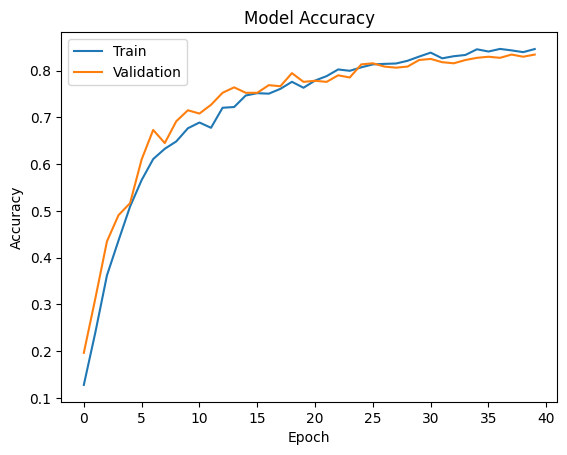

In [ ]:
plt.plot(history_16.history['accuracy'])
plt.plot(history_16.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations:**


*   Model **tune doesn't impact on performance** .







### **Evaluating the model on test data**

In [ ]:
accuracy = model_16.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - loss: 0.6907 - accuracy: 0.7832 - 352ms/epoch - 23ms/step


- On test, model goes worse.

- Let's go back to previous configuration and try with a few more epochs.


## **Model 17**

In [ ]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
# Fixing the seed for random number generators
import random
np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

In [ ]:
# Setting the rotation_range to 15
train_datagen = ImageDataGenerator(
                              rotation_range=15,
                              fill_mode='nearest'
                              )

In [ ]:
# Intializing a sequential model
model_17 = Sequential()

# Adding first conv layer with 128 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
model_17.add(Conv2D(128, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))
# Adding max pooling to reduce the size of output of first conv layer
model_17.add(MaxPooling2D((2, 2), padding = 'same'))
model_17.add(Dropout(0.25))

model_17.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model_17.add(MaxPooling2D((2, 2), padding = 'same'))
model_17.add(Dropout(0.25))

model_17.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model_17.add(MaxPooling2D((2, 2), padding = 'same'))
model_17.add(Dropout(0.25))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model_17.add(Flatten())

# Adding a fully connected dense layer with 32 neurons
model_17.add(Dense(32, activation='relu'))
# Adding a fully connected dense layer with 16 neurons
model_17.add(Dense(16, activation='relu'))

# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
model_17.add(Dense(12, activation='softmax'))

# Using Adam Optimizer
opt = Adam()

# Compile model
model_17.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model_17.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 128)       0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 32, 32, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0

### <b> Fitting the model on the train data

In [ ]:
history_17 = model_17.fit(
            train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=32,
                                       shuffle=False),
                                       epochs=45,
                                       steps_per_epoch=X_train_normalized.shape[0] // 32,
                                       validation_data=(X_val_normalized,y_val_encoded),
                                       verbose=1,callbacks=[learning_rate_reduction])

Epoch 1/45
120/120 [==============================] - 12s 79ms/step - loss: 2.4386 - accuracy: 0.1258 - val_loss: 2.4106 - val_accuracy: 0.1379 - lr: 0.0010
Epoch 2/45
120/120 [==============================] - 5s 40ms/step - loss: 2.3492 - accuracy: 0.1861 - val_loss: 2.1732 - val_accuracy: 0.2991 - lr: 0.0010
Epoch 3/45
120/120 [==============================] - 5s 40ms/step - loss: 1.9098 - accuracy: 0.3486 - val_loss: 1.7140 - val_accuracy: 0.3879 - lr: 0.0010
Epoch 4/45
120/120 [==============================] - 6s 53ms/step - loss: 1.6423 - accuracy: 0.4160 - val_loss: 1.4898 - val_accuracy: 0.4509 - lr: 0.0010
Epoch 5/45
120/120 [==============================] - 6s 49ms/step - loss: 1.4397 - accuracy: 0.4910 - val_loss: 1.2830 - val_accuracy: 0.5678 - lr: 0.0010
Epoch 6/45
120/120 [==============================] - 6s 46ms/step - loss: 1.2705 - accuracy: 0.5539 - val_loss: 1.2091 - val_accuracy: 0.6005 - lr: 0.0010
Epoch 7/45
120/120 [==============================] - 5s 40ms/s

### **Model Evaluation**

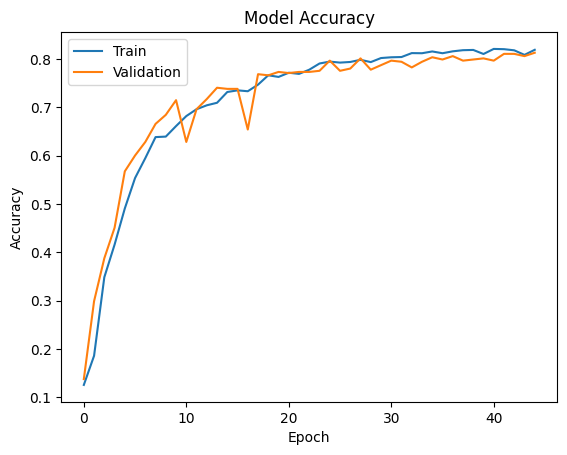

In [ ]:
plt.plot(history_17.history['accuracy'])
plt.plot(history_17.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations:**


*   Model performance still stays the same.
* We are going to check adding more epochs, but the graph is already showing us that tendency is going flat.







### **Evaluating the model on test data**

In [ ]:
accuracy = model_17.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - loss: 0.6834 - accuracy: 0.7811 - 87ms/epoch - 6ms/step


On test model degrade it's performance, previously was on 0.81% of accuracy.

### <b> Fitting the model on the train data

In [ ]:
history_17b = model_17.fit(
            train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=32,
                                       shuffle=True),
                                       epochs=10,
                                       steps_per_epoch=X_train_normalized.shape[0] // 32,
                                       validation_data=(X_val_normalized,y_val_encoded),
                                       verbose=1,callbacks=[learning_rate_reduction])

Epoch 1/10
120/120 [==============================] - 6s 53ms/step - loss: 0.5339 - accuracy: 0.8191 - val_loss: 0.6879 - val_accuracy: 0.7991 - lr: 3.1250e-05
Epoch 2/10
120/120 [==============================] - 9s 74ms/step - loss: 0.5283 - accuracy: 0.8257 - val_loss: 0.6813 - val_accuracy: 0.8084 - lr: 3.1250e-05
Epoch 3/10
120/120 [==============================] - 7s 59ms/step - loss: 0.5354 - accuracy: 0.8165 - val_loss: 0.7016 - val_accuracy: 0.7967 - lr: 3.1250e-05
Epoch 4/10
120/120 [==============================] - 7s 62ms/step - loss: 0.5453 - accuracy: 0.8173 - val_loss: 0.6881 - val_accuracy: 0.7991 - lr: 3.1250e-05
Epoch 5/10
120/120 [==============================] - 5s 40ms/step - loss: 0.5250 - accuracy: 0.8220 - val_loss: 0.6748 - val_accuracy: 0.8154 - lr: 3.1250e-05
Epoch 6/10
120/120 [==============================] - 5s 40ms/step - loss: 0.5259 - accuracy: 0.8233 - val_loss: 0.6855 - val_accuracy: 0.8154 - lr: 3.1250e-05
Epoch 7/10
120/120 [====================

### **Model Evaluation**

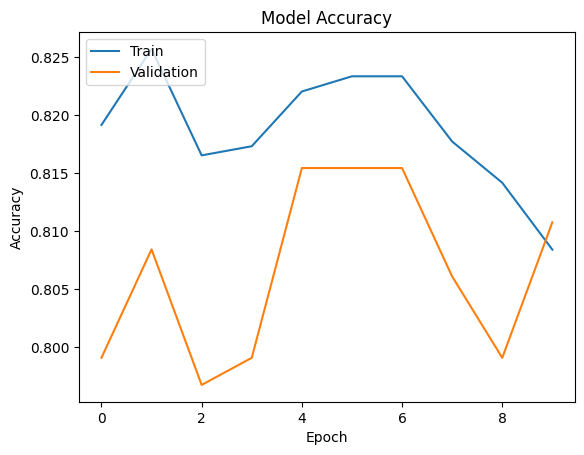

In [ ]:
plt.plot(history_17b.history['accuracy'])
plt.plot(history_17b.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations:**


*   Model performance doesn't improved.
* It appears that we've reached best performance in this model with this parameters.
* Let's do a final check adding another hidden layer.







### **Evaluating the model on test data**

In [ ]:
accuracy = model_17.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - loss: 0.6747 - accuracy: 0.7811 - 129ms/epoch - 9ms/step


On testing model doesn't improved.

## **Model 18**

* We add another hidden layer

In [ ]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
# Fixing the seed for random number generators
import random
np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

In [ ]:
# Setting the rotation_range to 15
train_datagen = ImageDataGenerator(
                              rotation_range=15,
                              fill_mode='nearest'
                              )

In [ ]:
# Intializing a sequential model
model_18 = Sequential()

# Adding first conv layer with 256 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
model_18.add(Conv2D(256, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))
# Adding max pooling to reduce the size of output of first conv layer
model_18.add(MaxPooling2D((2, 2), padding = 'same'))
model_18.add(Dropout(0.25))

model_18.add(Conv2D(128, (3, 3), activation='relu', padding="same"))
# Adding max pooling to reduce the size of output of first conv layer
model_18.add(MaxPooling2D((2, 2), padding = 'same'))
model_18.add(Dropout(0.25))

model_18.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model_18.add(MaxPooling2D((2, 2), padding = 'same'))
model_18.add(Dropout(0.25))

model_18.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model_18.add(MaxPooling2D((2, 2), padding = 'same'))
model_18.add(Dropout(0.25))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model_18.add(Flatten())

# Adding a fully connected dense layer with 32 neurons
model_18.add(Dense(32, activation='relu'))
# Adding a fully connected dense layer with 16 neurons
model_18.add(Dense(16, activation='relu'))

# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
model_18.add(Dense(12, activation='softmax'))

# Using Adam Optimizer
opt = Adam()

# Compile model
model_18.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model_18.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 256)       7168      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 256)       0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 32, 32, 256)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 128)       295040    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 128)       0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 128)       0

### <b> Fitting the model on the train data

In [ ]:
history_18 = model_18.fit(
            train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=32,
                                       shuffle=False),
                                       epochs=45,
                                       steps_per_epoch=X_train_normalized.shape[0] // 32,
                                       validation_data=(X_val_normalized,y_val_encoded),
                                       verbose=1,callbacks=[learning_rate_reduction])

Epoch 1/45
120/120 [==============================] - 234s 2s/step - loss: 2.4458 - accuracy: 0.1201 - val_loss: 2.4033 - val_accuracy: 0.1285 - lr: 0.0010
Epoch 2/45
120/120 [==============================] - 230s 2s/step - loss: 2.2639 - accuracy: 0.2375 - val_loss: 2.0477 - val_accuracy: 0.3364 - lr: 0.0010
Epoch 3/45
120/120 [==============================] - 229s 2s/step - loss: 1.9816 - accuracy: 0.3607 - val_loss: 1.8679 - val_accuracy: 0.4393 - lr: 0.0010
Epoch 4/45
120/120 [==============================] - 229s 2s/step - loss: 1.7372 - accuracy: 0.4131 - val_loss: 1.5248 - val_accuracy: 0.5047 - lr: 0.0010
Epoch 5/45
120/120 [==============================] - 230s 2s/step - loss: 1.5322 - accuracy: 0.4710 - val_loss: 1.3505 - val_accuracy: 0.5374 - lr: 0.0010
Epoch 6/45
120/120 [==============================] - 231s 2s/step - loss: 1.3834 - accuracy: 0.5206 - val_loss: 1.2621 - val_accuracy: 0.5748 - lr: 0.0010
Epoch 7/45
120/120 [==============================] - 229s 2s/st

### **Model Evaluation**

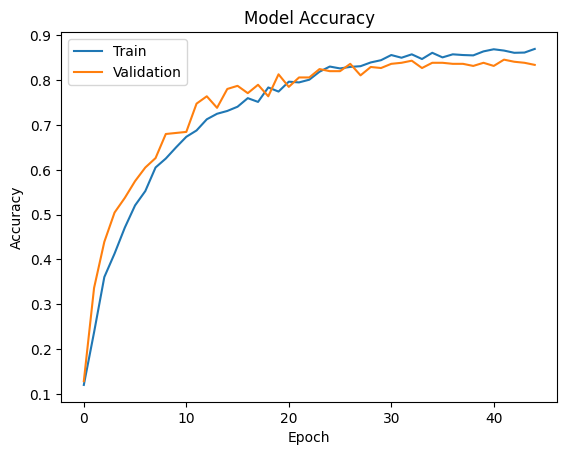

In [ ]:
plt.plot(history_18.history['accuracy'])
plt.plot(history_18.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations:**


*   Model could overcome the 0.80 barrier.
*   Training and validation are pretty near, which shows us that model is generalizing.
- Till now is the best model that we've built.








### **Evaluating the model on test data**

In [ ]:
accuracy = model_18.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 7s - loss: 0.4704 - accuracy: 0.8484 - 7s/epoch - 494ms/step


- On testing, model still keeps accuracy over 0.80 and we also achieve the best accuracy till now.
- Let's check on confusion matrix.


In [ ]:
# Here we would get the output as probablities for each category
y_pred=model_18.predict(X_test_normalized)

15/15 [==============================] - 9s 593ms/step


In [ ]:
y_pred

array([[3.1976791e-03, 3.6707344e-05, 1.8766323e-02, ..., 3.2720502e-05,
        6.4894634e-01, 1.7063899e-02],
       [1.5850893e-07, 1.0685706e-02, 4.3841922e-03, ..., 2.6925744e-02,
        9.4761795e-01, 1.4317660e-03],
       [1.8374948e-07, 2.7578038e-09, 1.7269709e-06, ..., 3.0156880e-04,
        1.8551601e-04, 4.4654561e-03],
       ...,
       [1.4172683e-07, 9.1421086e-01, 8.4778130e-02, ..., 1.1364724e-05,
        2.2541160e-05, 4.1502164e-04],
       [1.6314487e-16, 4.1872904e-15, 1.1402902e-10, ..., 3.2071312e-06,
        4.2724100e-08, 9.6342845e-09],
       [1.3554196e-02, 2.0794210e-03, 1.5303404e-02, ..., 1.2795606e-03,
        3.5366189e-04, 3.8879180e-01]], dtype=float32)

### **Plotting the Confusion Matrix**

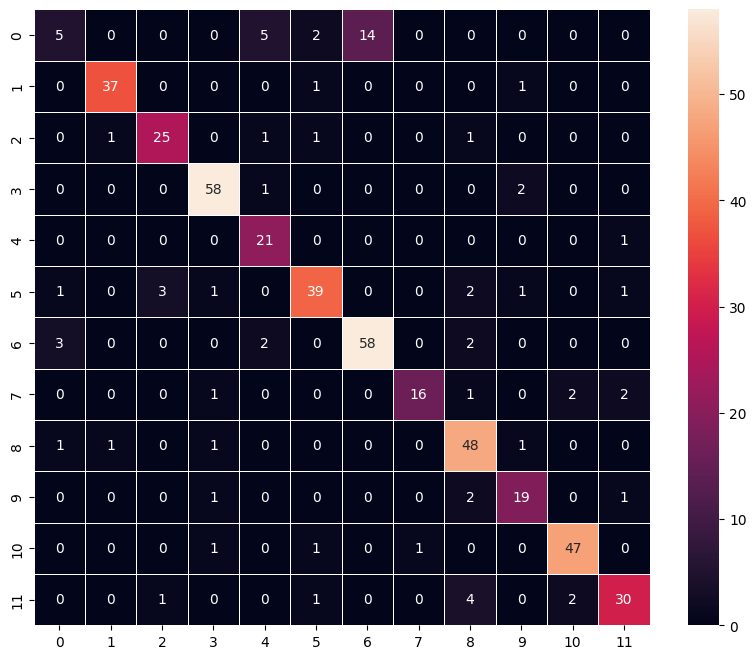

In [ ]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

<b> Observations</b><br>

- Class 0 don't improve, still is most classified as class 6, but now is also classified on class 4.
- Almost every other class is correctly predicted, showing us an improvement in terms of classification.

#### Let's check it in terms of percentage to clarify the numbers

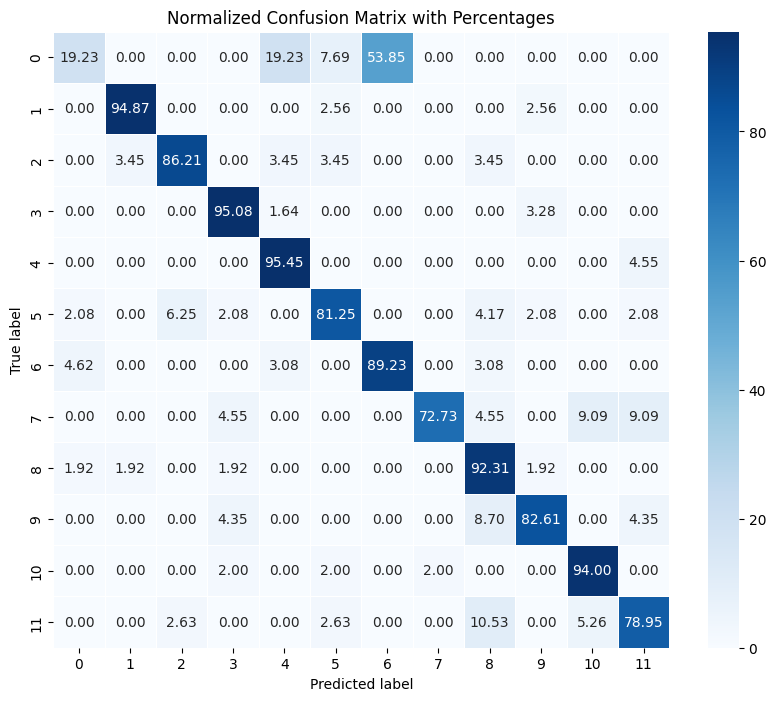

In [ ]:
from sklearn.metrics import confusion_matrix as sk_confusion_matrix

# Obtain the categorical values from y_test_encoded and y_pred
y_pred_arg = np.argmax(y_pred, axis=1)
y_test_arg = np.argmax(y_test_encoded, axis=1)

# Compute the confusion matrix using sklearn's confusion_matrix function
conf_matrix = sk_confusion_matrix(y_test_arg, y_pred_arg)

# Normalize the confusion matrix by row (i.e., by the number of samples in each actual class)
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Convert to percentage
conf_matrix_percentage = conf_matrix_normalized * 100

# Plot the normalized confusion matrix
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    conf_matrix_percentage,
    annot=True,
    fmt=".2f",  # Display values as floating-point numbers with 2 decimal places
    linewidths=.4,
    square=True,
    cmap="Blues",  # Choose a color map
    ax=ax
)
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
ax.set_title('Normalized Confusion Matrix with Percentages')

plt.show()

Previous observations (model 9)

- Class 0 is being classified as class 6 62% of the times, it has improved, but there's work to do still.
- Class 4 improved (previous 59%), but class 9 has decreased (previous 74%), compensating it.
- Almost evey other class has set their floor at 80%, and now are new classes over 90%
- Still, there's margin to improve.

**Observations of the current model**

- Class 0 is being misclassified 80% of the times, it decreases respect previous model (previous 70%).
- Every other class, except 7, is predicted with a +0,80% accuracy
- Now we've got 6 classes reaching + 0.90% of accuracy
- Without class 0 principal diagonal accuracy is around 0.88.
- Classes with best perfomance (except class 4) are the ones with most available images. We can check it on upper confusion matrix, the classes are 1, 3, 4, 6, 8 and 10.
- It would be good to add recall, precision and f1 score to compare metrics

## **Model 19**

Let's do a final model with even more power on architecture to discover more specific charactestics and check if we can solve class 0 issue.

In [ ]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
# Fixing the seed for random number generators
import random
np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

In [ ]:
# Setting the rotation_range to 15
train_datagen = ImageDataGenerator(
                              rotation_range=15,
                              fill_mode='nearest'
                              )

In [ ]:
# Intializing a sequential model
model_19 = Sequential()

# Adding first conv layer with 256 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
model_19.add(Conv2D(256, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))
model_19.add(BatchNormalization())  # Add Batch Normalization
# Adding max pooling to reduce the size of output of first conv layer
model_19.add(MaxPooling2D((2, 2), padding = 'same'))
model_19.add(Dropout(0.25))

model_19.add(Conv2D(128, (3, 3), activation='relu', padding="same"))
# Adding max pooling to reduce the size of output of first conv layer
model_19.add(BatchNormalization())  # Add Batch Normalization
model_19.add(MaxPooling2D((2, 2), padding = 'same'))
model_19.add(Dropout(0.25))

model_19.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model_19.add(BatchNormalization())  # Add Batch Normalization
model_19.add(MaxPooling2D((2, 2), padding = 'same'))
model_19.add(Dropout(0.25))

model_19.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model_19.add(BatchNormalization())  # Add Batch Normalization
model_19.add(MaxPooling2D((2, 2), padding = 'same'))
model_19.add(Dropout(0.25))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model_19.add(Flatten())

# Adding a fully connected dense layer with 64 neurons
model_19.add(Dense(128, activation='relu'))
model_19.add(BatchNormalization())  # Add Batch Normalization
model_19.add(Dropout(0.25))

# Adding a fully connected dense layer with 64 neurons
model_19.add(Dense(64, activation='relu'))
model_19.add(BatchNormalization())  # Add Batch Normalization
model_19.add(Dropout(0.25))

# Adding a fully connected dense layer with 32 neurons
model_19.add(Dense(32, activation='relu'))
model_19.add(BatchNormalization())  # Add Batch Normalization
model_19.add(Dropout(0.25))

# Adding a fully connected dense layer with 16 neurons
model_19.add(Dense(16, activation='relu'))
model_19.add(BatchNormalization())  # Add Batch Normalization
model_19.add(Dropout(0.25))

# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
model_19.add(Dense(12, activation='softmax'))

# Using Adam Optimizer
opt = Adam()

# Compile model
model_19.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model_19.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 256)       7168      
                                                                 
 batch_normalization (Batch  (None, 64, 64, 256)       1024      
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 256)       0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 32, 32, 256)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 128)       295040    
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 128)       5

#### <b> Fitting the model on the train data

In [ ]:
history_19 = model_19.fit(
            train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=32,
                                       shuffle=False),
                                       epochs=30,
                                       steps_per_epoch=X_train_normalized.shape[0] // 32,
                                       validation_data=(X_val_normalized,y_val_encoded),
                                       verbose=1,callbacks=[learning_rate_reduction])

Epoch 1/30
120/120 [==============================] - 24s 107ms/step - loss: 2.8156 - accuracy: 0.1067 - val_loss: 2.9144 - val_accuracy: 0.1379 - lr: 0.0010
Epoch 2/30
120/120 [==============================] - 7s 54ms/step - loss: 2.3151 - accuracy: 0.2131 - val_loss: 7.8585 - val_accuracy: 0.1379 - lr: 0.0010
Epoch 3/30
120/120 [==============================] - 8s 67ms/step - loss: 2.0356 - accuracy: 0.2991 - val_loss: 6.8837 - val_accuracy: 0.1379 - lr: 0.0010
Epoch 4/30
120/120 [==============================] - ETA: 0s - loss: 1.8582 - accuracy: 0.3733
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
120/120 [==============================] - 6s 53ms/step - loss: 1.8582 - accuracy: 0.3733 - val_loss: 4.1173 - val_accuracy: 0.1379 - lr: 0.0010
Epoch 5/30
120/120 [==============================] - 8s 66ms/step - loss: 1.7175 - accuracy: 0.4236 - val_loss: 2.3935 - val_accuracy: 0.2009 - lr: 5.0000e-04
Epoch 6/30
120/120 [==============================] -

#### **Model Evaluation**

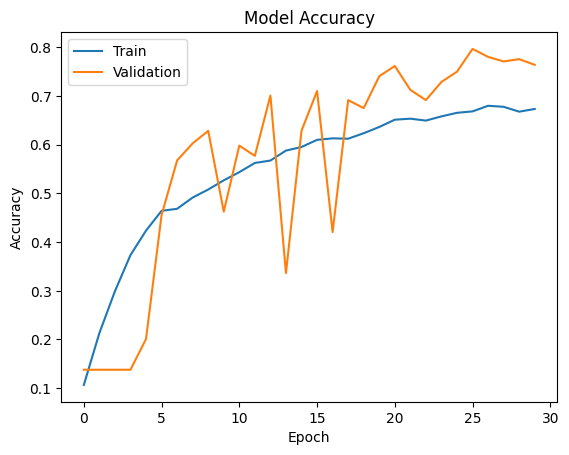

In [ ]:
plt.plot(history_19.history['accuracy'])
plt.plot(history_19.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations:**


*   Model performance is not as well as we expected.
* Model shows inestability and is not learning despite it has a powerful structure.
*Let's move forward and keep model 18.







#### **Evaluating the model on test data**

In [ ]:
accuracy = model_19.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - loss: 0.8601 - accuracy: 0.7305 - 180ms/epoch - 12ms/step


On testing also couldn't overcome our best model.

## **Final Model**

We finally choose model 18, it was the one with best performance. Let's compare every model:

In [ ]:
pd.DataFrame({'Models':['Model 1','Model 2','Model 3','Model 4','Model 5', 'Model 6', 'Model 7', 'Model 8', 'Model 9', 'Model 10', 'Model 11', 'Model 12', 'Model 13', 'Model 14', 'Model 15', 'Model 16', 'Model 17', 'Model 18', 'Model 19'],'Train Accuracy':['67%','78%','99%','69%','50%','87%','72%','19%','88%','61%','72%','14%','14%','58%','88%','85%','81%','87%','67%'],'Validation Accuracy':['71%','68%','70%','72%','65%','82%','72%','15%','85%','69%','78%','14%','14%','59%','79%','83%','81%','83%','76%'],'Test Accuracy':['67%','62%','58%','69%','61%','76%','70%','17%','81%','67%','75%','14%','14%','60%','75%','78%','/8%','85%','73%']})

Models Train Accuracy Validation Accuracy Test Accuracy
0    Model 1            67%                 71%           67%
1    Model 2            78%                 68%           62%
2    Model 3            99%                 70%           58%
3    Model 4            69%                 72%           69%
4    Model 5            50%                 65%           61%
5    Model 6            87%                 82%           76%
6    Model 7            72%                 72%           70%
7    Model 8            19%                 15%           17%
8    Model 9            88%                 85%           81%
9   Model 10            61%                 69%           67%
10  Model 11            72%                 78%           75%
11  Model 12            14%                 14%           14%
12  Model 13            14%                 14%           14%
13  Model 14            58%                 59%           60%
14  Model 15            88%                 79%           75%
15  Model 16            85%                 83%           78%
16  Model 17            81%                 81%           /8%
17  Model 18            87%                 83%           85%
18  Model 19            67%                 76%           73%

**Model 18** is the best all around model. Let's visualize the prediction

### Visualizing the prediction

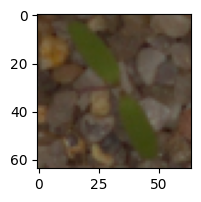

1/1 [==============================] - 0s 30ms/step
Predicted Label ['Fat Hen']
True Label Fat Hen


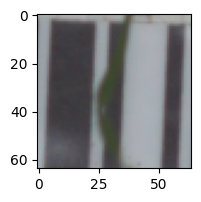

1/1 [==============================] - 0s 33ms/step
Predicted Label ['Common wheat']
True Label Black-grass


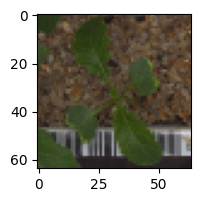

1/1 [==============================] - 0s 29ms/step
Predicted Label ['Charlock']
True Label Charlock


In [ ]:
# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_test[2])
plt.show()
print('Predicted Label', enc.inverse_transform(model_18.predict((X_test_normalized[2].reshape(1,64,64,3)))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[2])                                               # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[33])
plt.show()
print('Predicted Label', enc.inverse_transform(model_18.predict((X_test_normalized[33].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[33])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[36])
plt.show()
print('Predicted Label', enc.inverse_transform(model_18.predict((X_test_normalized[36].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[36])                                              # using inverse_transform() to get the output label from the output vector

## Conclusion
- We can observe from the confusion matrix of all the models that our model 18 was the best model because it predicted the majority of the classes better than the other models.
- The test accuracy of the model 18 was 85%.
- Data Augmentation does not helped in improving the model. VGG16 neither.
- Our best model has less complex architecture than VGG16 model and second best model, model 9, has similar performance with even less computational cost.
- We didn't use all the posibilities for improving our model, but maybe, model could be even better.
- I finished the whole notebook and I realized that I could add recall, precision and f1 score metrics to evaluate model although I don't think that model selection would change. I would run it with this metrics, but I don't have the pro version so every model tooks me between 1 and 4 hours and I don't have the time to do it.

### Let's check why there's differences between classes in terms of RGB:

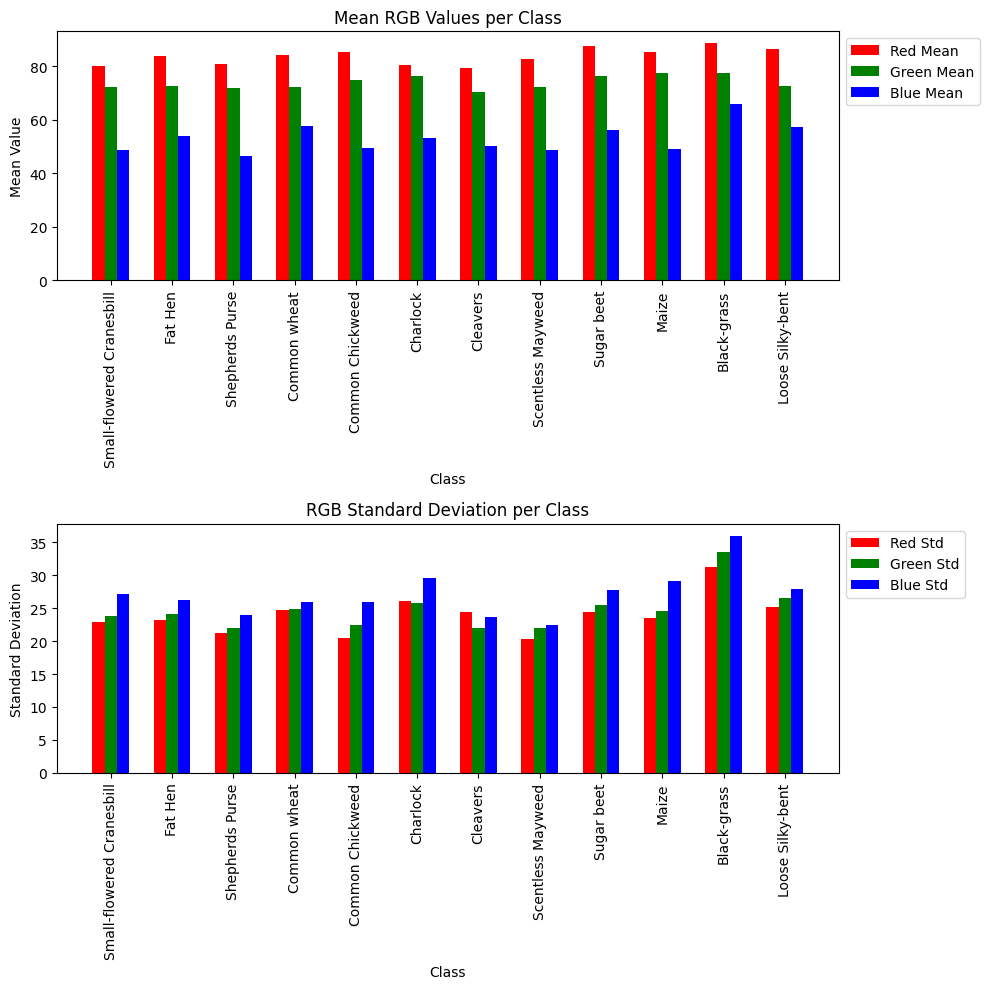

In [ ]:
# Extract unique classes
unique_classes = labels['Label'].unique()

# Dictionary to store RGB statistics for each class
rgb_stats = {}

# Calculate RGB statistics for each class
for cls in unique_classes:
    class_indices = labels.index[labels['Label'] == cls].tolist()
    class_images = images[class_indices]
    r_means = []
    g_means = []
    b_means = []
    r_stds = []
    g_stds = []
    b_stds = []

    for img in class_images:
        r_means.append(np.mean(img[:, :, 0]))
        g_means.append(np.mean(img[:, :, 1]))
        b_means.append(np.mean(img[:, :, 2]))
        r_stds.append(np.std(img[:, :, 0]))
        g_stds.append(np.std(img[:, :, 1]))
        b_stds.append(np.std(img[:, :, 2]))

    rgb_stats[cls] = {
        'r_mean': np.mean(r_means),
        'g_mean': np.mean(g_means),
        'b_mean': np.mean(b_means),
        'r_std': np.mean(r_stds),
        'g_std': np.mean(g_stds),
        'b_std': np.mean(b_stds)
    }

# Prepare data for plotting
classes = list(rgb_stats.keys())
r_means = [rgb_stats[cls]['r_mean'] for cls in classes]
g_means = [rgb_stats[cls]['g_mean'] for cls in classes]
b_means = [rgb_stats[cls]['b_mean'] for cls in classes]
r_stds = [rgb_stats[cls]['r_std'] for cls in classes]
g_stds = [rgb_stats[cls]['g_std'] for cls in classes]
b_stds = [rgb_stats[cls]['b_std'] for cls in classes]

x = np.arange(len(classes))

# Plot mean RGB values per class
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.bar(x - 0.2, r_means, 0.2, label='Red Mean', color='red')
plt.bar(x, g_means, 0.2, label='Green Mean', color='green')
plt.bar(x + 0.2, b_means, 0.2, label='Blue Mean', color='blue')
plt.xlabel('Class')
plt.ylabel('Mean Value')
plt.xticks(x, classes, rotation=90)
plt.title('Mean RGB Values per Class')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Plot standard deviation of RGB values per class
plt.subplot(2, 1, 2)
plt.bar(x - 0.2, r_stds, 0.2, label='Red Std', color='red')
plt.bar(x, g_stds, 0.2, label='Green Std', color='green')
plt.bar(x + 0.2, b_stds, 0.2, label='Blue Std', color='blue')
plt.xlabel('Class')
plt.ylabel('Standard Deviation')
plt.xticks(x, classes, rotation=90)
plt.title('RGB Standard Deviation per Class')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

- Black-Grass is the class 0, and model confuses it with Loose Silky-bent. Checking on average RGB values per class looks very similar.
- But when we see the RGB standard deviation of black-grass it's the highest of the dataset.

#### Let's check on images:

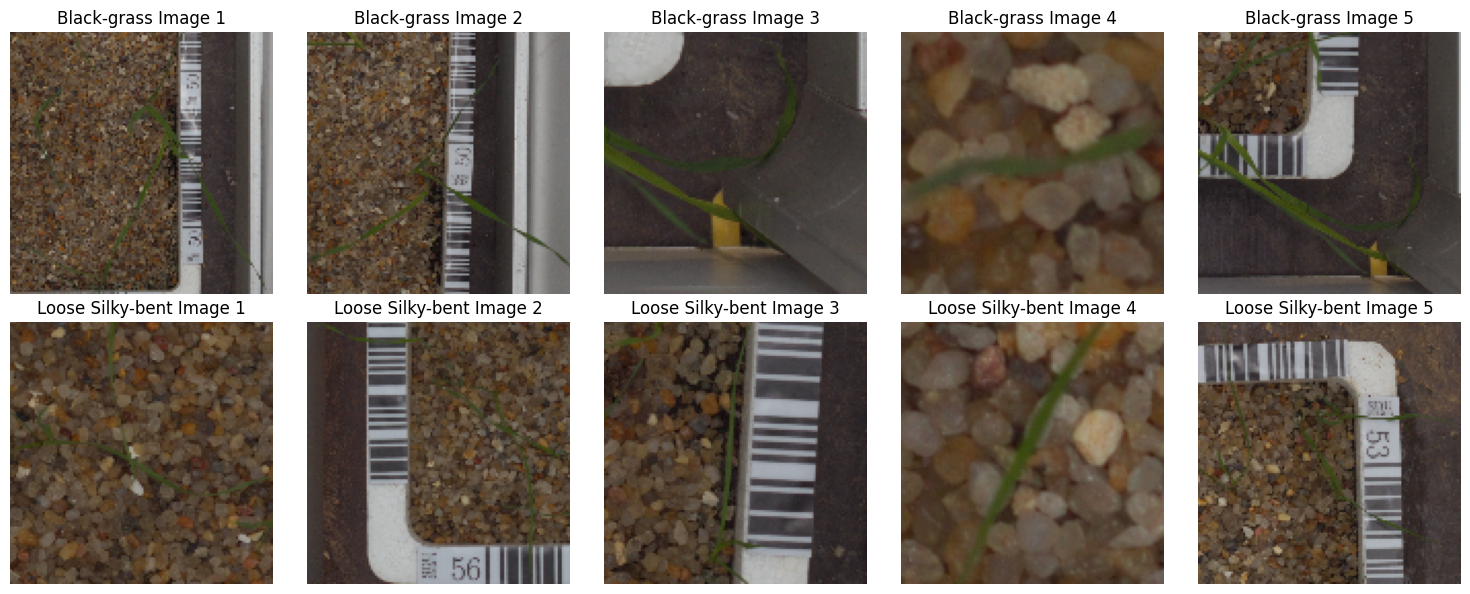

In [ ]:
# Choose two different classes
class1 = 'Black-grass'
class2 = 'Loose Silky-bent'

# Get indices of images for each class
class1_indices = labels.index[labels['Label'] == class1].tolist()[:5]
class2_indices = labels.index[labels['Label'] == class2].tolist()[:5]

# Plot images
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

# Plot class 1 images
for i, idx in enumerate(class1_indices):
    ax = axes[0, i]
    ax.imshow(images[idx])
    ax.set_title(f'{class1} Image {i+1}')
    ax.axis('off')

# Plot class 2 images
for i, idx in enumerate(class2_indices):
    ax = axes[1, i]
    ax.imshow(images[idx])
    ax.set_title(f'{class2} Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

Now we can understand why this happens:
- Black grass images have the same rocks that Loose Silky-bent images
- Also it has those bar codes, which turns to confuse the model because are on both classes and this feature is very preponderant.
- Also looking on the grass blade, both are very simlilar.

## Actionable Insights and Business Recommendations

- Model is giving generalized predictions and almost every class is near to 80% correctly predicted.
- Black-Grass was the most difficult class to predict. We'll have to ask to Aarhus University Signal Processing group better images to this particular kind of seed.
- It would be good to give special treatment to black-grass class using oversampling/undersampling techniques or some kind specialized treatment in the case that would be difficult to have better images.
- On the forward images they take, the zoom should be the same, also the camera angles. Having a place where they left every kind of seed and an image is taken would be good in order to have uniform background and consistent lighting.
- High-Resolution Images: Request high-resolution images to capture more details, which can help the model distinguish subtle differences between classes.
- Focus on Critical Features: Guide the imaging process to focus on critical features of the plants, such as leaf shape, vein patterns, and seed characteristics.
- Also, it would be good to add priorities. In this data set, we've got a class imbalance problem and it's clear that plants with the most examples are the best predicted. If they prefer to have more accuracy on some kind of weeds it would be great to be specified on objective.
- Collaborative Studies: Collaborate with research institutions like Aarhus University to conduct studies on plant identification, using the model as a data collection tool.

_____